In [1]:
#Library for data manupulation
import pandas as pd   
import numpy as np  
import datetime as dt
# For creating visualizations

import matplotlib.pyplot as plt 
import seaborn as sns

# Library for ML 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline 
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler ,OneHotEncoder

#Library for evaluation metrices
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.metrics import  silhouette_score

#library that provide association rule functunality
from mlxtend.frequent_patterns import apriori  
from mlxtend.frequent_patterns import association_rules

In [2]:
sales=pd.read_csv('Online_Sales.csv')
cust= pd.read_excel('CustomersData.xlsx')
disc = pd.read_csv('Discount_Coupon.csv')
mkt_spends = pd.read_csv('Marketing_Spend.csv')
tax = pd.read_excel('Tax_amount.xlsx')

In [3]:
sales.head()

CustomerID  Transaction_ID  Transaction_Date     Product_SKU  \
0       17850           16679          20190101  GGOENEBJ079499   
1       17850           16680          20190101  GGOENEBJ079499   
2       17850           16681          20190101  GGOEGFKQ020399   
3       17850           16682          20190101  GGOEGAAB010516   
4       17850           16682          20190101  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71               6.5          Used  
2         1       2.05               6.5          Used  
3         5      17.53               6.5      Not Used  
4         1      16.50               6.5          Used

#### Here the Transaction_Date columns is not in correct format we have to convert it into a standard ddate time format.

In [4]:
def date_time(d):
    y=str(d)[:4]+"/"+ str(d)[4:6]+"/"+str(d)[6:]
    return y

In [5]:
sales['Transaction_Date']=sales['Transaction_Date'].apply(date_time)

In [6]:
sales['Transaction_Date']=pd.to_datetime(sales['Transaction_Date'])

In [7]:
sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71               6.5          Used  
2         1       2.05               6.5          Used  
3         5      17.53               6.5      Not Used  
4         1      16.50               6.5          Used

In [8]:
cust.head()

CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30
4       15100      M  California             49

In [9]:
disc.head()

Month Product_Category  Coupon_Code  Discount_pct
0   Jan           Apparel      SALE10            10
1   Feb           Apparel      SALE20            20
2   Mar           Apparel      SALE30            30
3   Jan          Nest-USA      ELEC10            10
4   Feb          Nest-USA      ELEC20            20

In [10]:
mkt_spends.head()

Date  Offline_Spend  Online_Spend
0  1/1/2019           4500       2424.50
1  1/2/2019           4500       3480.36
2  1/3/2019           4500       1576.38
3  1/4/2019           4500       2928.55
4  1/5/2019           4500       4055.30

In [11]:
mkt_spends['Date']=pd.to_datetime(mkt_spends['Date'])

In [12]:
tax.head()

Product_Category   GST
0         Nest-USA  0.10
1           Office  0.10
2          Apparel  0.18
3             Bags  0.18
4        Drinkware  0.18

#### Merging all the data frames to make a Master Dataframe having all the data.

In [13]:
c_s = pd.merge(left=cust,right=sales,left_on='CustomerID',right_on='CustomerID',how='inner')

In [14]:
disc.head(3)

Month Product_Category  Coupon_Code  Discount_pct
0   Jan           Apparel      SALE10            10
1   Feb           Apparel      SALE20            20
2   Mar           Apparel      SALE30            30

In [15]:
def month_name(date):
    return date.strftime('%b')

In [16]:
c_s['Transaction_month']=c_s['Transaction_Date'].apply(month_name)

In [17]:
c_s_d=pd.merge(left=c_s,right=disc,left_on=['Transaction_month','Product_Category'],right_on=['Month','Product_Category '],how='inner')

In [18]:
mkt_spends.head(2)

Date  Offline_Spend  Online_Spend
0 2019-01-01           4500       2424.50
1 2019-01-02           4500       3480.36

In [19]:
c_s_d_m=pd.merge(left=c_s_d,right=mkt_spends,left_on='Transaction_Date',right_on='Date',how='inner')

In [20]:
master = pd.merge(left=c_s_d_m,right=tax,left_on='Product_Category',right_on='Product_Category',how='inner')

In [21]:
master.head()

CustomerID Gender Location  Tenure_Months  Transaction_ID Transaction_Date  \
0       17850      M  Chicago             12           16679       2019-01-01   
1       17850      M  Chicago             12           16680       2019-01-01   
2       17850      M  Chicago             12           16696       2019-01-01   
3       17850      M  Chicago             12           16699       2019-01-01   
4       17850      M  Chicago             12           16700       2019-01-01   

      Product_SKU                                Product_Description  \
0  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
1  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
2  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
3  GGOENEBQ079099    Nest Protect Smoke + CO White Battery Alarm-USA   
4  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   

  Product_Category  Quantity  ...  Coupon_Status  Transaction_month Month  \
0         Nest-USA         1  ...           Used                Jan   Jan   
1         Nest-USA         1  ...           Used                Jan   Jan   
2         Nest-USA         2  ...       Not Used                Jan   Jan   
3         Nest-USA         1  ...        Clicked                Jan   Jan   
4         Nest-USA         1  ...        Clicked                Jan   Jan   

  Product_Category  Coupon_Code Discount_pct       Date  Offline_Spend  \
0          Nest-USA      ELEC10           10 2019-01-01           4500   
1          Nest-USA      ELEC10           10 2019-01-01           4500   
2          Nest-USA      ELEC10           10 2019-01-01           4500   
3          Nest-USA      ELEC10           10 2019-01-01           4500   
4          Nest-USA      ELEC10           10 2019-01-01           4500   

  Online_Spend  GST  
0       2424.5  0.1  
1       2424.5  0.1  
2       2424.5  0.1  
3       2424.5  0.1  
4       2424.5  0.1  

[5 rows x 22 columns]

#### Creating a invoice column with the below formula
Invoice Value =(( Quantity * Avg_price) * (1-Dicount_pct) * (1+GST))+Delivery_Charges

In [22]:
master['Invoice_value']=(((master['Quantity']) * master['Avg_Price']) * ( 1- (master['Discount_pct']/100) * (1 + master['GST']))) + master['Delivery_Charges']

### Detailed exploratory analysis

In [23]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

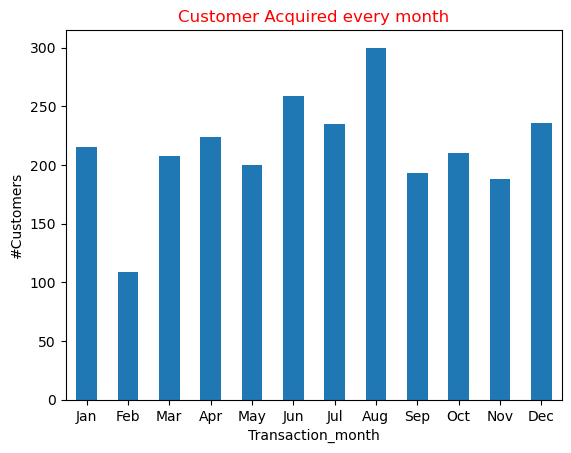

In [24]:
master.groupby('Transaction_month')['CustomerID'].nunique().loc[months].plot(kind='bar')
plt.title("Customer Acquired every month",c='r')
plt.ylabel("#Customers")
plt.xticks(rotation=0)
plt.show()

In [25]:
master.groupby('Transaction_month')['CustomerID'].nunique().mean()

214.75

#### Understanding how many customers acquired every month:
Most number of customers are acquired in August  followed by June and December .And average 214.75 customers join every month.

In [26]:
q=master.groupby('Transaction_month')['CustomerID'].nunique()

In [27]:
q=q.loc[months]

In [28]:
q=pd.DataFrame(q)

In [29]:
q=q['CustomerID'].shift(-1) / q['CustomerID']

In [30]:
q.name = 'Retention_rate'

In [31]:
#q=pd.DataFrame(q)
q.index.name='Months'

In [32]:
pd.DataFrame(q)

Retention_rate
Months                
Jan           0.506977
Feb           1.908257
Mar           1.076923
Apr           0.892857
May           1.295000
Jun           0.907336
Jul           1.276596
Aug           0.643333
Sep           1.088083
Oct           0.895238
Nov           1.255319
Dec                NaN

#### Understand the retention of customers on month on month basis.
The retention rate of customers is going up and down .There is no pattern in Customer retention.

In [33]:
master.groupby('Transaction_month')['CustomerID'].nunique()

Transaction_month
Apr    224
Aug    300
Dec    236
Feb    109
Jan    215
Jul    235
Jun    259
Mar    208
May    200
Nov    188
Oct    210
Sep    193
Name: CustomerID, dtype: int64

#### How the revenues from existing/new customers on month on month basis

In [34]:
master['first_tran_date'] = master.groupby(by='CustomerID')['Transaction_Date'].transform(min)

In [35]:
master['first_tran_date'] = pd.to_datetime(master['first_tran_date'])

In [36]:
master['new/old_flag'] = np.where((master['first_tran_date'].dt.year == master['Transaction_Date'].dt.year) 
                                 & (master['first_tran_date'].dt.month == master['Transaction_Date'].dt.month),"Old","New")

In [37]:
master.groupby(by=['Transaction_month','new/old_flag']).agg(revenue = ('Invoice_value',sum))

revenue
Transaction_month new/old_flag              
Apr               New           160466.09036
                  Old           232747.34797
Aug               New           193351.10220
                  Old           177913.88484
Dec               New           205001.23834
                  Old           184004.06731
Feb               New            36425.70208
                  Old           251383.13112
Jan               Old           414824.88195
Jul               New           226878.13498
                  Old           149352.90973
Jun               New           100874.33661
                  Old           148090.64880
Mar               New            48008.30912
                  Old           240602.84741
May               New            99848.03088
                  Old           176631.74428
Nov               New           245878.47008
                  Old           184193.55308
Oct               New           189869.18231
                  Old           219247.24174
Sep               New           165616.57733
                  Old           115248.65325

In [38]:
master['Invoice_value_no_disc']=master['Invoice_value'] -( master['Discount_pct'])/100

In [39]:
master['Discount_amount']=master['Invoice_value'] - master['Invoice_value_no_disc']

In [40]:
x=master['Invoice_value'].sum()

In [41]:
y=master['Discount_amount'].sum()

In [42]:
print(round((y/x) * 100,2)," % of total revenue was  discounted  by Company.")

0.25  % of total revenue was  discounted  by Company.


In [43]:
master.groupby(by='Product_Category').agg(Discount_amount = ('Invoice_value',sum)).sort_values(by='Discount_amount',ascending=False)

Discount_amount
Product_Category                     
Nest-USA                 2.095895e+06
Apparel                  6.290442e+05
Nest                     4.140673e+05
Office                   3.163207e+05
Drinkware                2.041403e+05
Bags                     1.416165e+05
Notebooks & Journals     1.040138e+05
Lifestyle                1.011695e+05
Nest-Canada              5.845471e+04
Headgear                 5.078062e+04
Gift Cards               1.659812e+04
Waze                     1.011442e+04
Bottles                  8.963735e+03
Accessories              8.547538e+03
Housewares               5.816355e+03
Android                  9.149464e+02

#### Product categories like Nest-USA , Apparel , Office are given more discount. 0.25  % of total revenue was given as discount by Company.

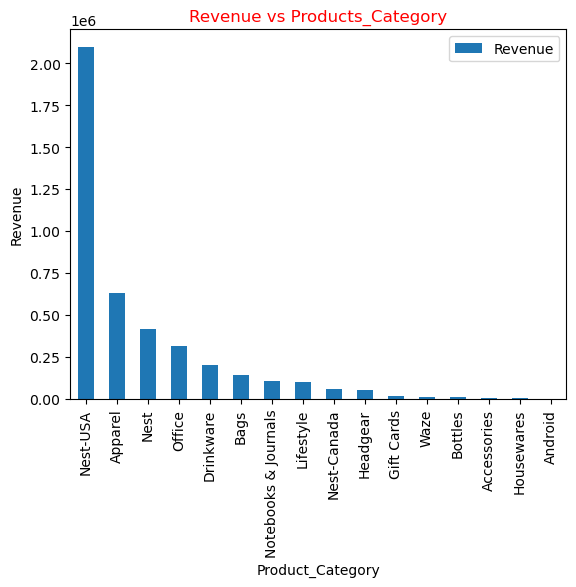

In [44]:
master.groupby(by='Product_Category').agg(Revenue = ('Invoice_value',sum)).sort_values(by='Revenue',ascending=False).plot(kind='bar')
plt.title("Revenue vs Products_Category",c='r')
plt.ylabel("Revenue")
plt.show()

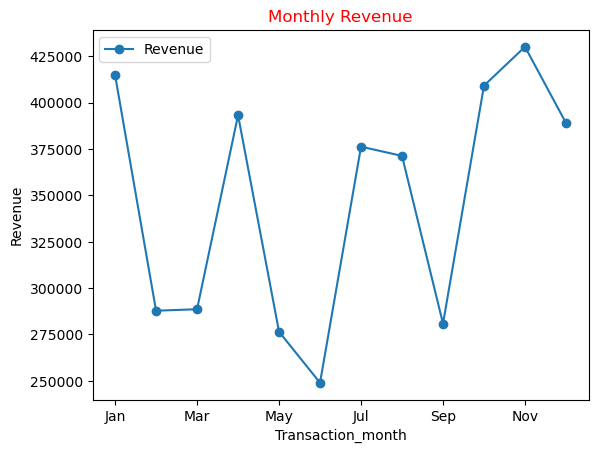

In [45]:
master.groupby(by='Transaction_month').agg(Revenue = ('Invoice_value',sum)).loc[months].plot(kind='line',marker="o")
plt.title("Monthly Revenue",c='r')
plt.ylabel("Revenue")
plt.show()

In [46]:
print("Total revenue",master['Invoice_value'].sum())

Total revenue 4166458.08577


#### Total revenue  of the Company is 4166458.08 .Profucts categoies like Nest-USA , Apparel , Nest ,Office are making more revenue that others

In [47]:
print("Total number of transactions in 12 months ",master['Transaction_ID'].count())

Total number of transactions in 12 months  52524


In [48]:
master.groupby(by='Location')['Transaction_ID'].count()

Location
California       16008
Chicago          18240
New Jersey        4470
New York         11097
Washington DC     2709
Name: Transaction_ID, dtype: int64

#### Total 52524 orders were placed in 12 months. 16008 orders were placed from California followed by Chicago with 18240 orders.

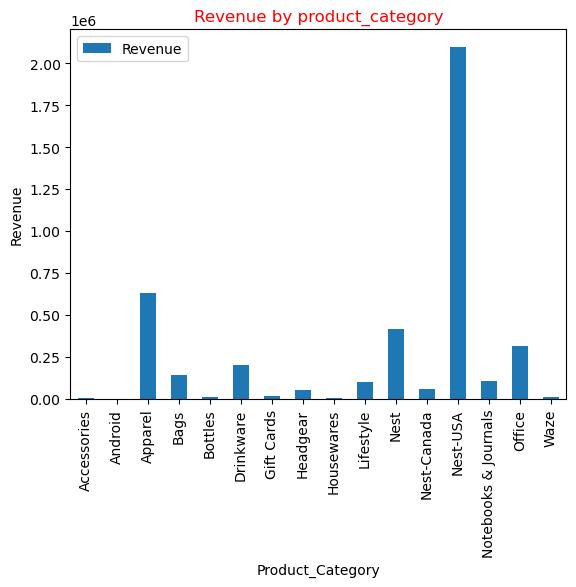

In [49]:
master.groupby(by=['Product_Category']).agg(Revenue = ('Invoice_value',sum)).plot(kind='bar')
plt.title('Revenue by product_category',c='r')
plt.ylabel("Revenue")
plt.show()

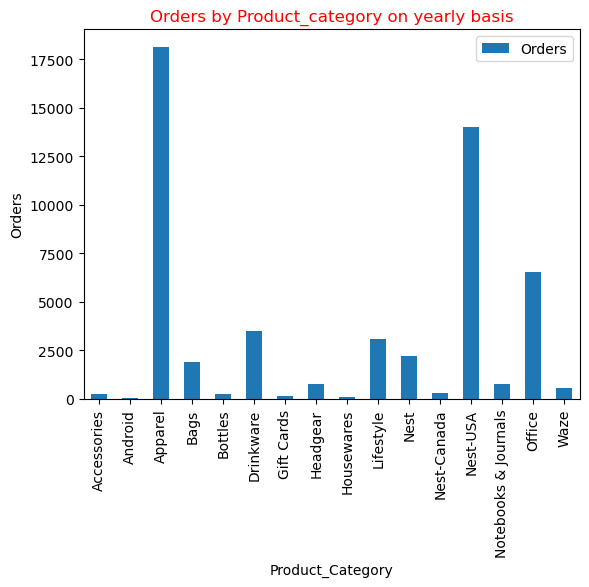

In [50]:
master.groupby(by=['Product_Category']).agg(Orders = ('Transaction_ID','count')).plot(kind='bar')
plt.title("Orders by Product_category on yearly basis",c='r')
plt.ylabel("Orders")
plt.show()

<Figure size 640x480 with 0 Axes>

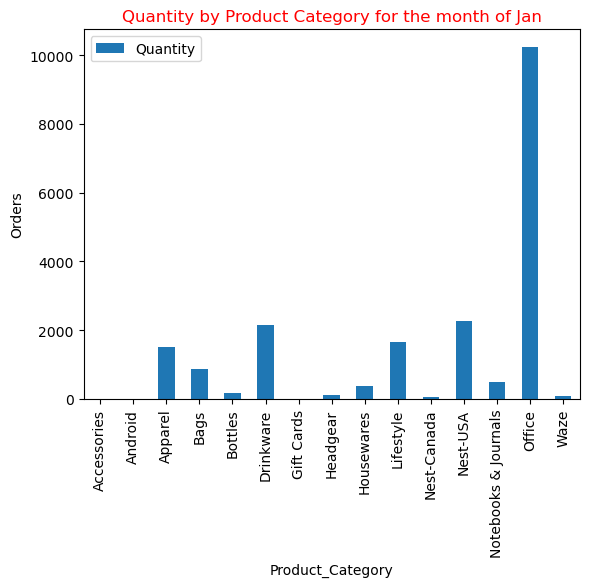

<Figure size 640x480 with 0 Axes>

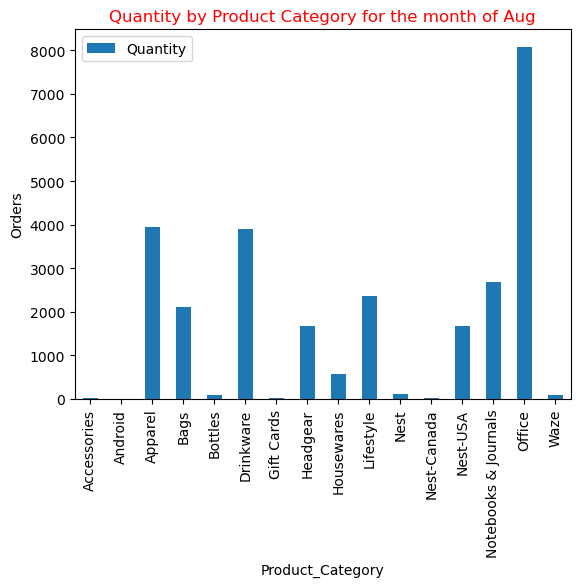

<Figure size 640x480 with 0 Axes>

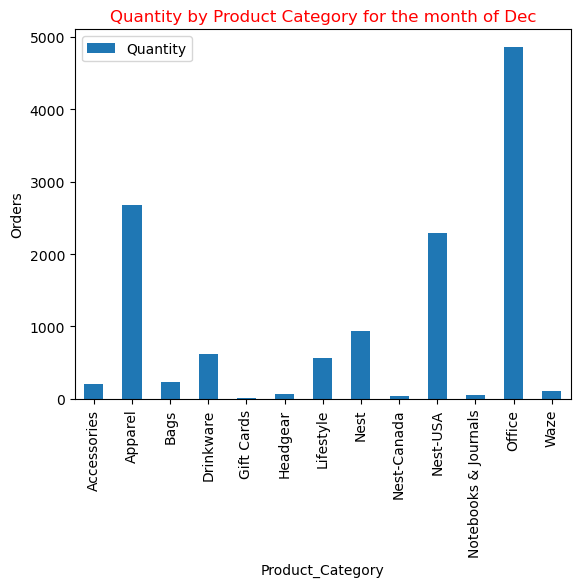

<Figure size 640x480 with 0 Axes>

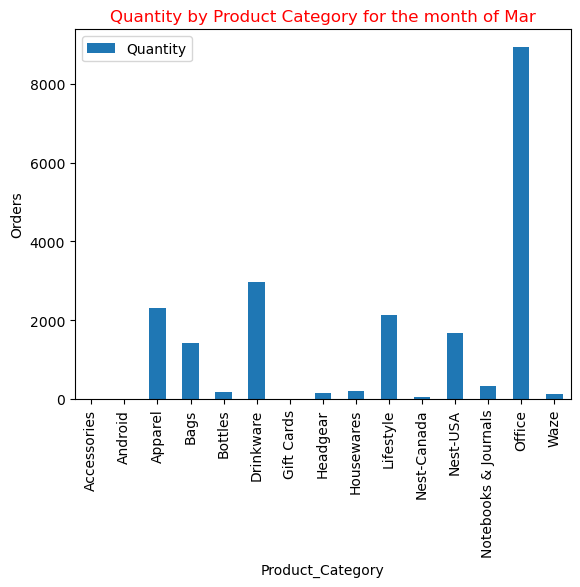

<Figure size 640x480 with 0 Axes>

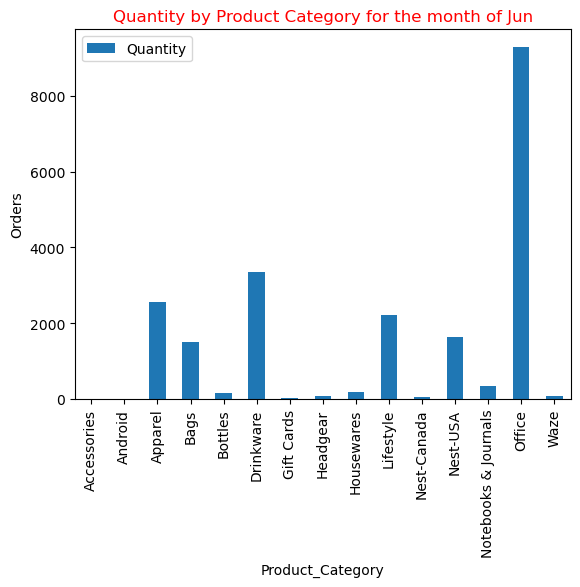

<Figure size 640x480 with 0 Axes>

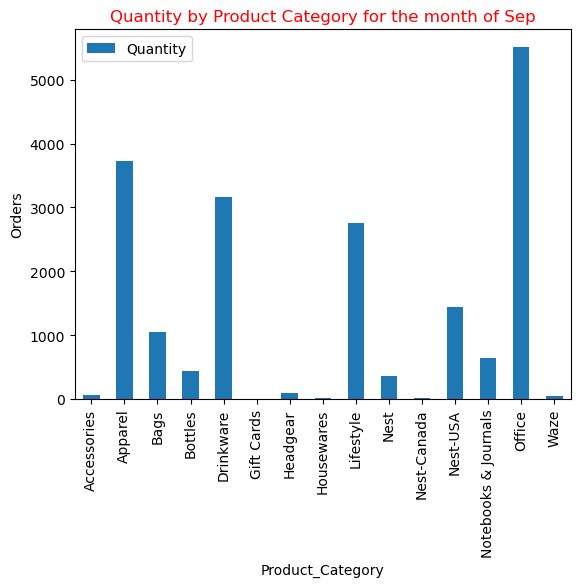

<Figure size 640x480 with 0 Axes>

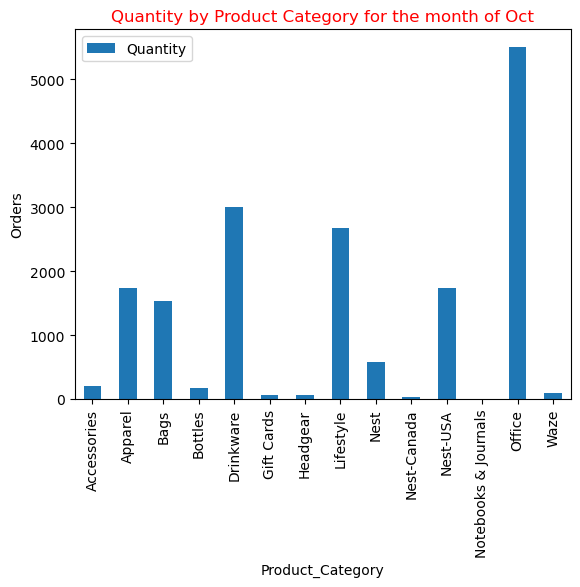

<Figure size 640x480 with 0 Axes>

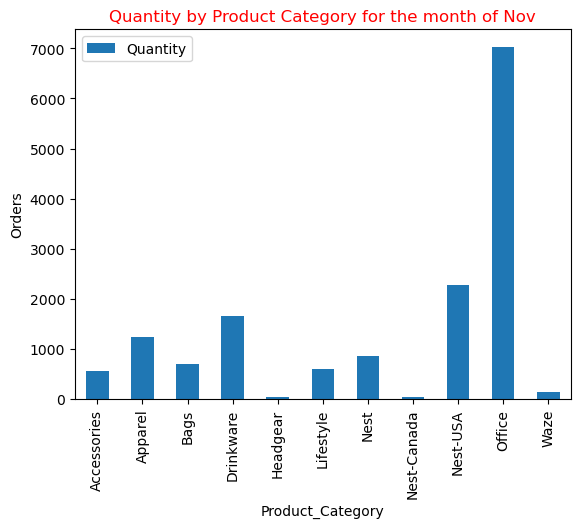

<Figure size 640x480 with 0 Axes>

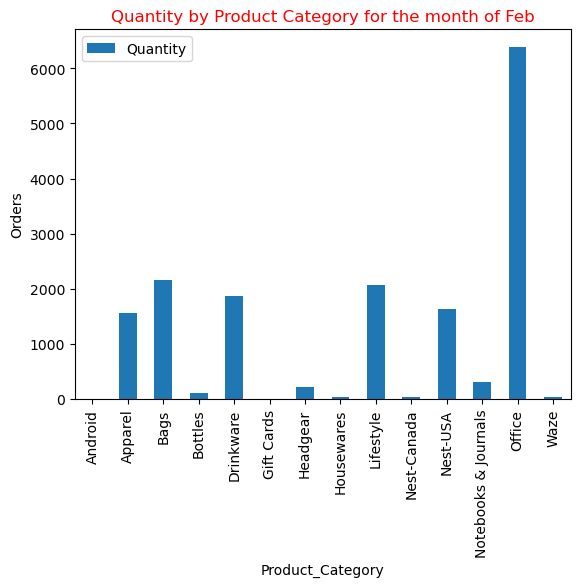

<Figure size 640x480 with 0 Axes>

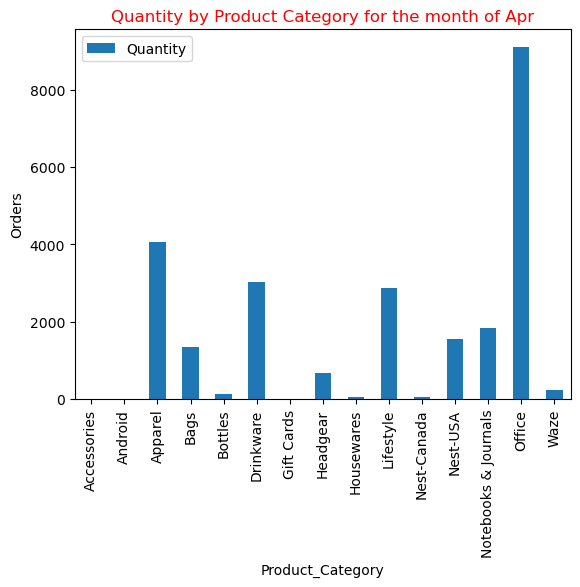

<Figure size 640x480 with 0 Axes>

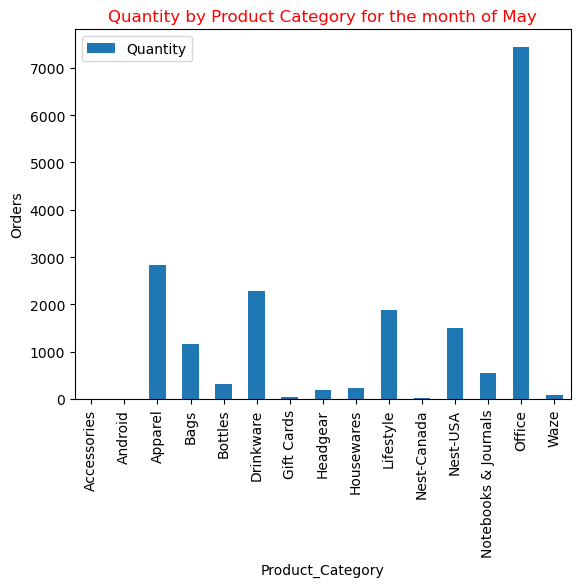

<Figure size 640x480 with 0 Axes>

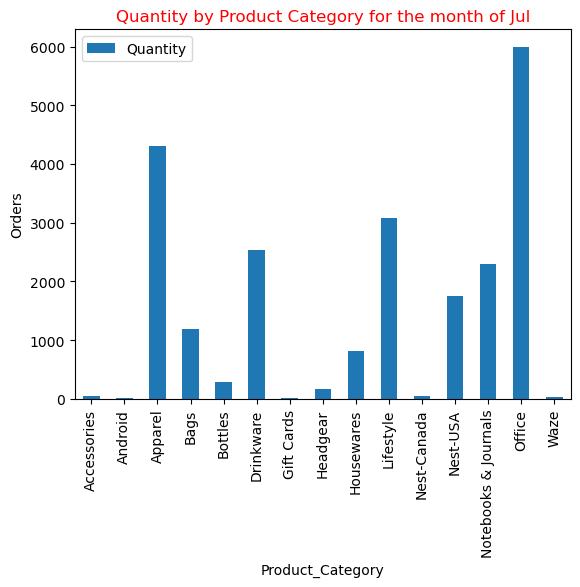

In [51]:
for i in master['Transaction_month'].unique():
    plt.figure()
    x=master.loc[(master['Transaction_month'] == i)]
    x.groupby(by=['Product_Category']).agg(Quantity = ('Quantity',sum)).plot(kind='bar')
    plt.title(f"Quantity by Product Category for the month of {i}",c='r')
    plt.ylabel("Orders")
    plt.show()

#### From the above plots we can conclude that Apparel is in demand throughout the year.But Nest-USA is  generateing the most revenue being second in demand.Whear as office has most number of Quantity ordered.

<Figure size 640x480 with 0 Axes>

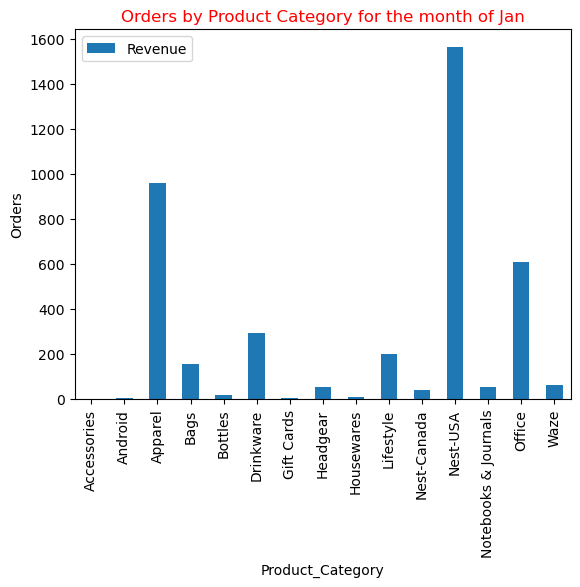

<Figure size 640x480 with 0 Axes>

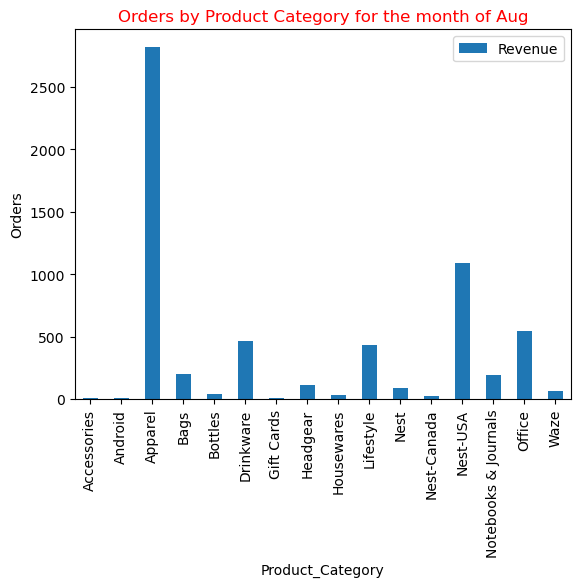

<Figure size 640x480 with 0 Axes>

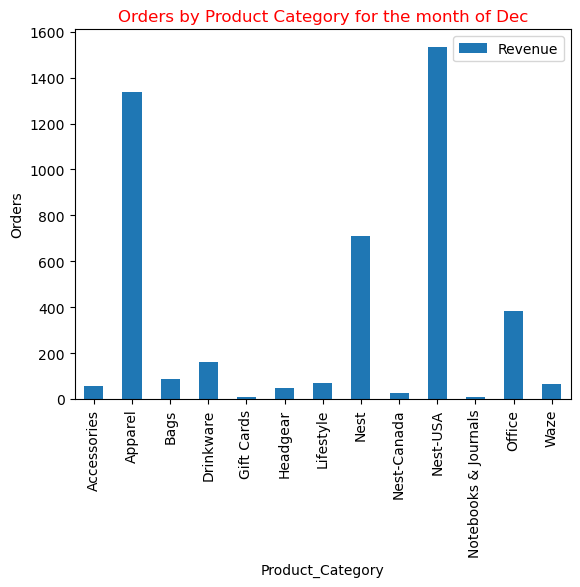

<Figure size 640x480 with 0 Axes>

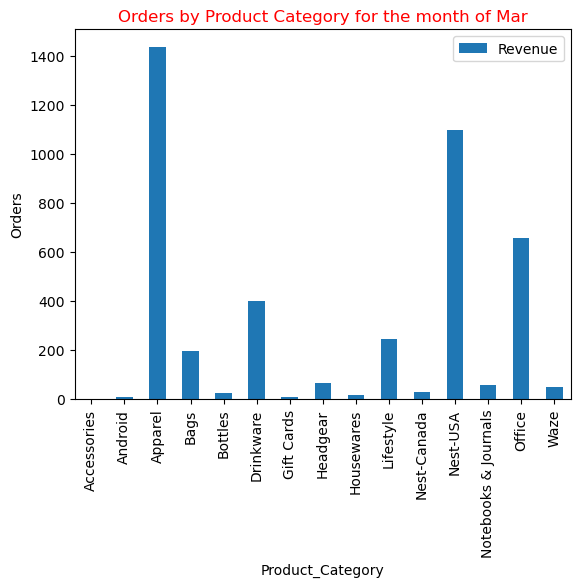

<Figure size 640x480 with 0 Axes>

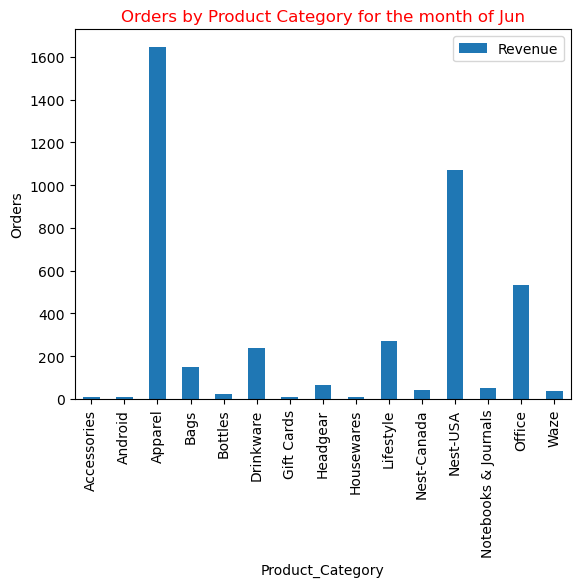

<Figure size 640x480 with 0 Axes>

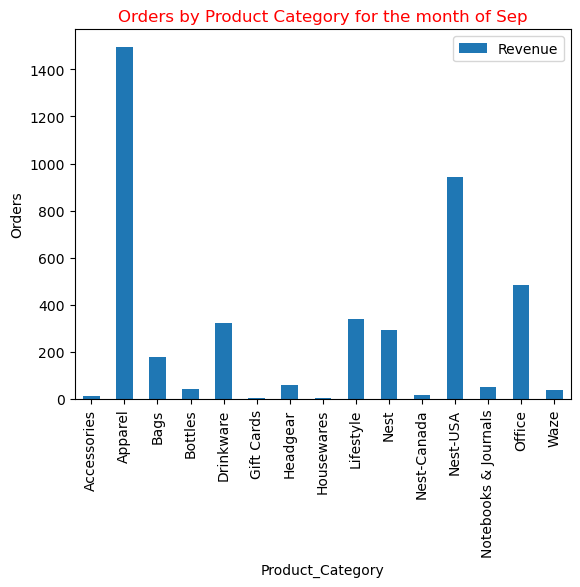

<Figure size 640x480 with 0 Axes>

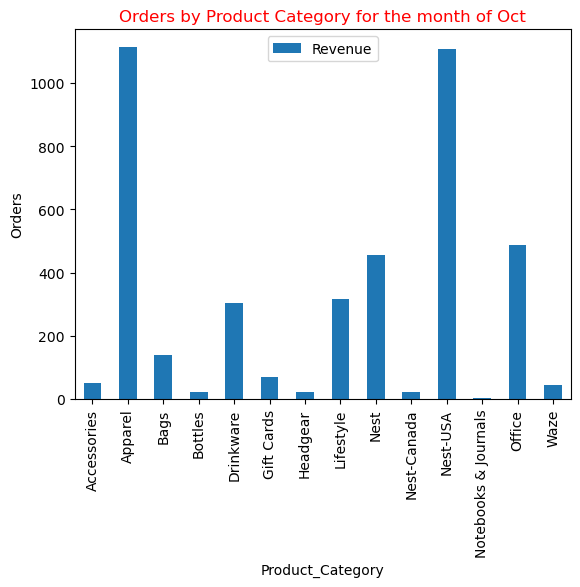

<Figure size 640x480 with 0 Axes>

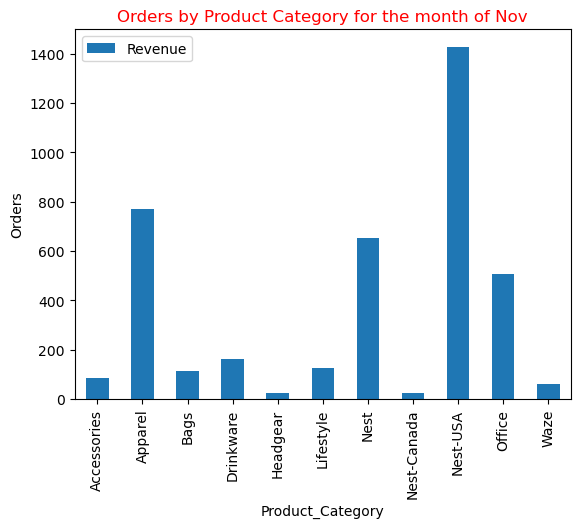

<Figure size 640x480 with 0 Axes>

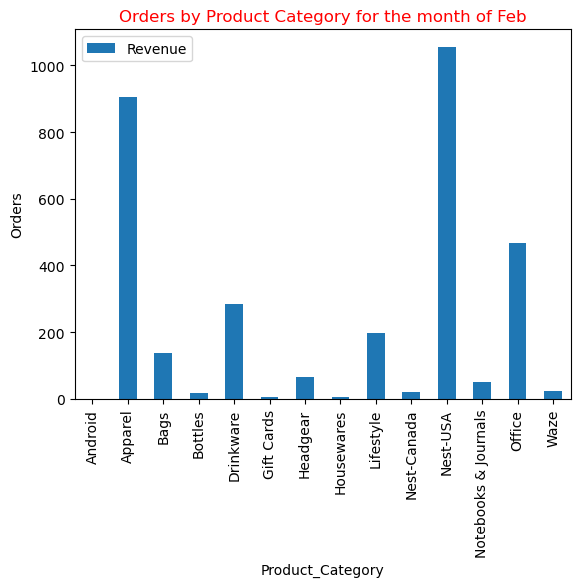

<Figure size 640x480 with 0 Axes>

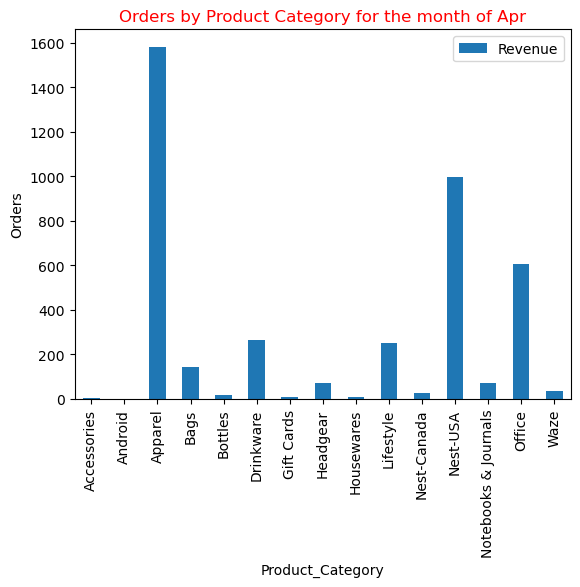

<Figure size 640x480 with 0 Axes>

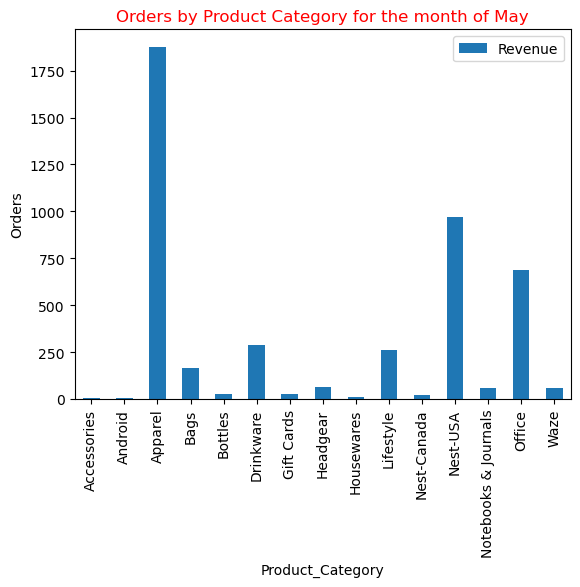

<Figure size 640x480 with 0 Axes>

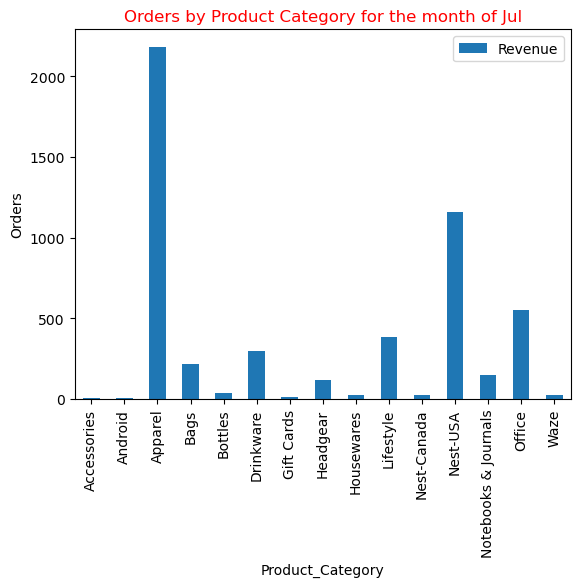

In [52]:
for i in master['Transaction_month'].unique():
    plt.figure()
    x=master.loc[(master['Transaction_month'] == i)]
    x.groupby(by=['Product_Category']).agg(Revenue = ('Transaction_ID','count')).plot(kind='bar')
    plt.title(f"Orders by Product Category for the month of {i}",c='r')
    plt.ylabel("Orders")
    plt.show()

#### Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc

<Figure size 640x480 with 0 Axes>

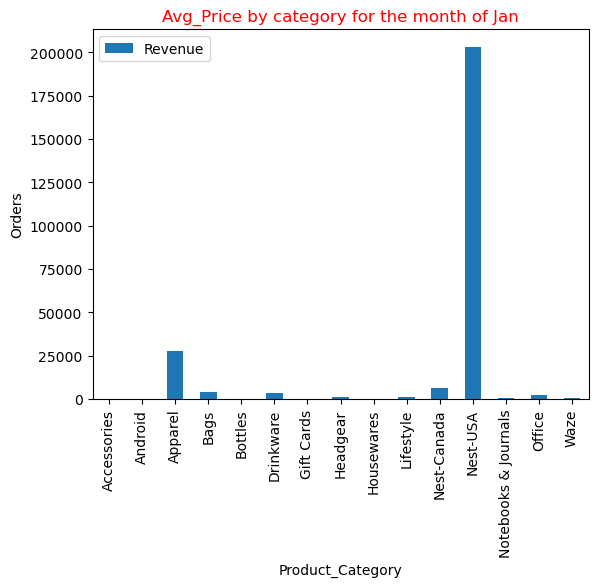

<Figure size 640x480 with 0 Axes>

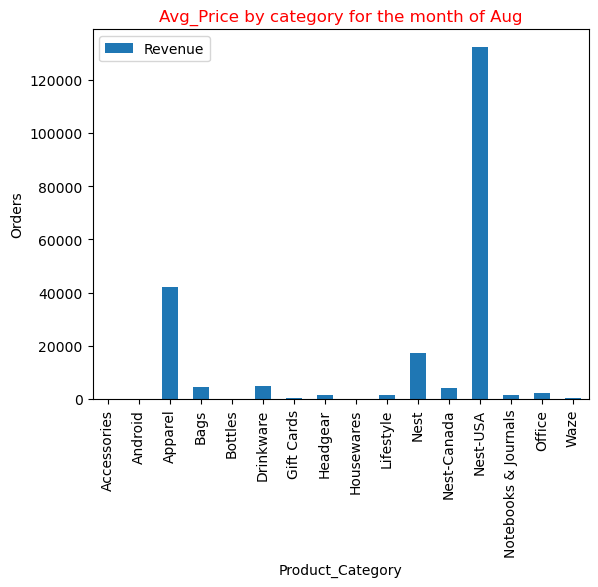

<Figure size 640x480 with 0 Axes>

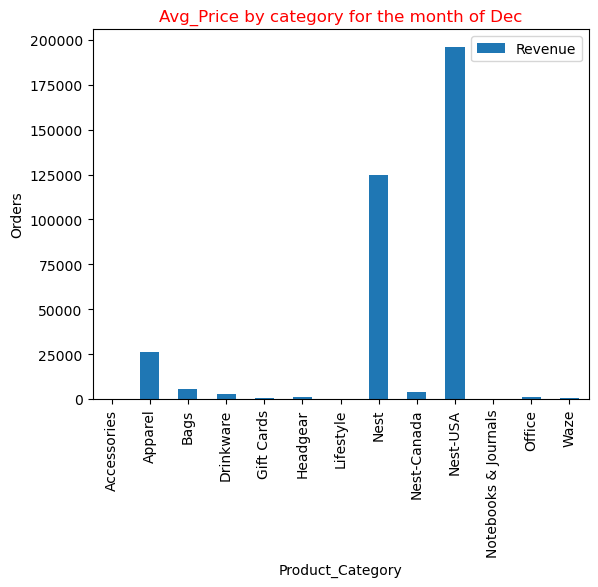

<Figure size 640x480 with 0 Axes>

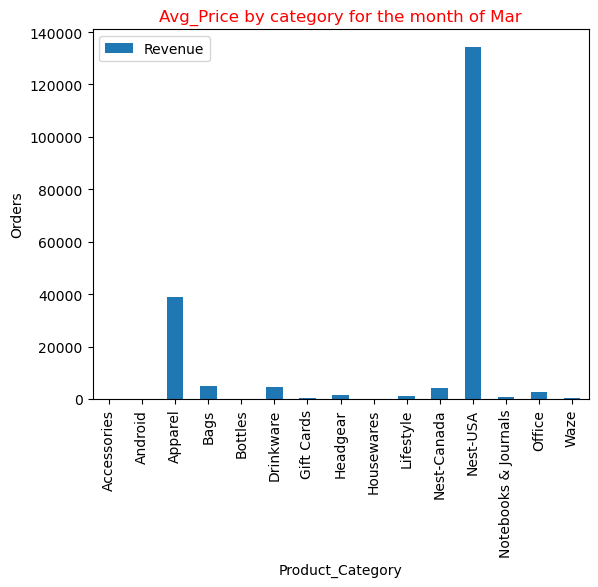

<Figure size 640x480 with 0 Axes>

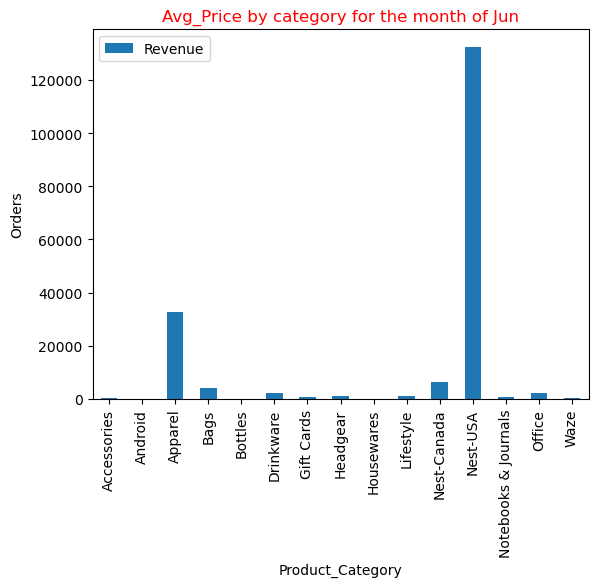

<Figure size 640x480 with 0 Axes>

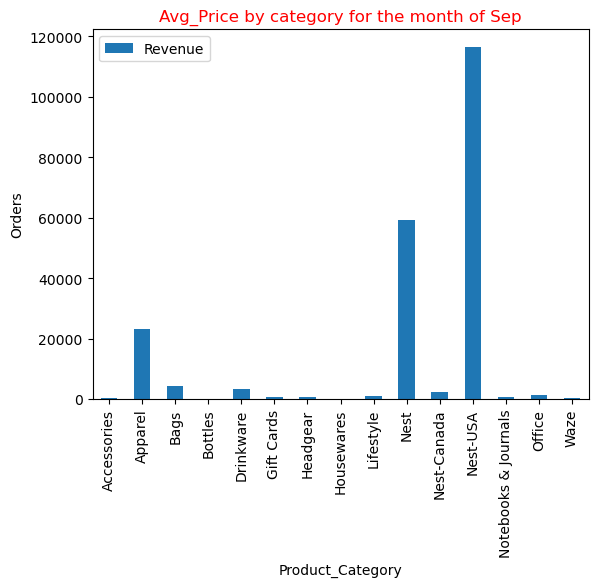

<Figure size 640x480 with 0 Axes>

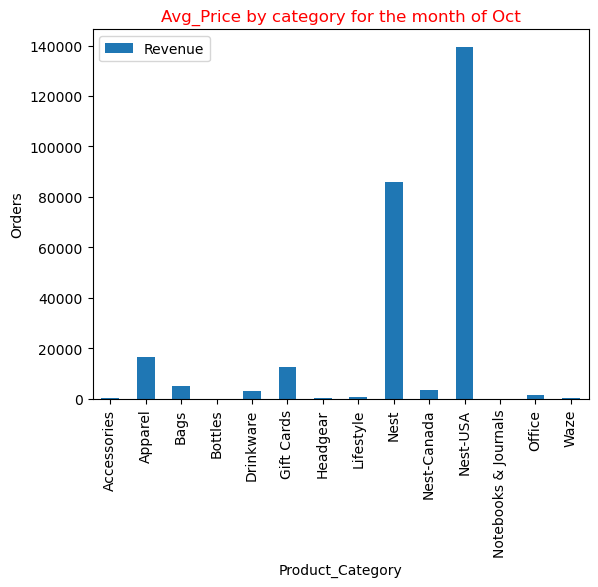

<Figure size 640x480 with 0 Axes>

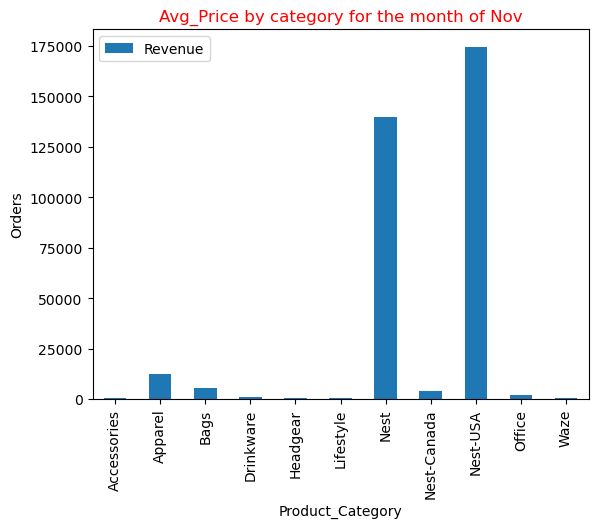

<Figure size 640x480 with 0 Axes>

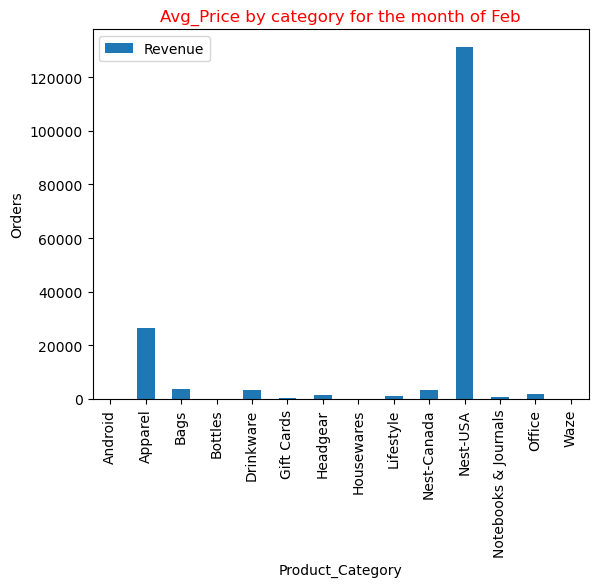

<Figure size 640x480 with 0 Axes>

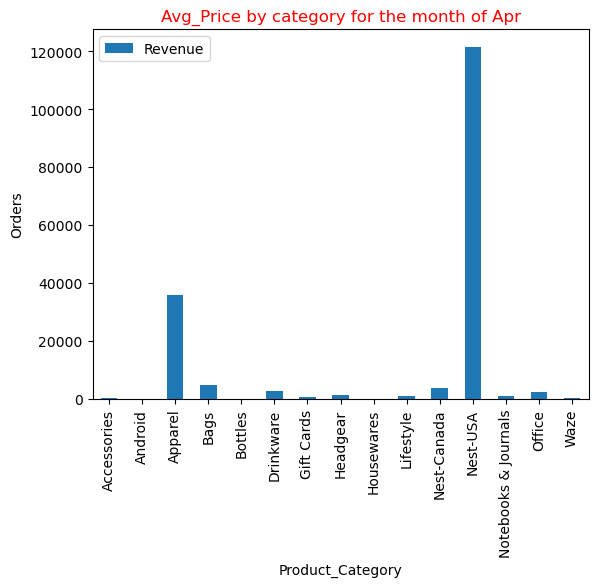

<Figure size 640x480 with 0 Axes>

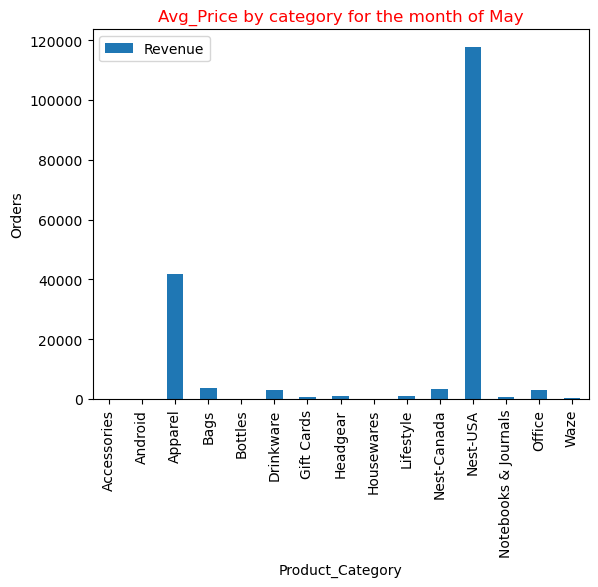

<Figure size 640x480 with 0 Axes>

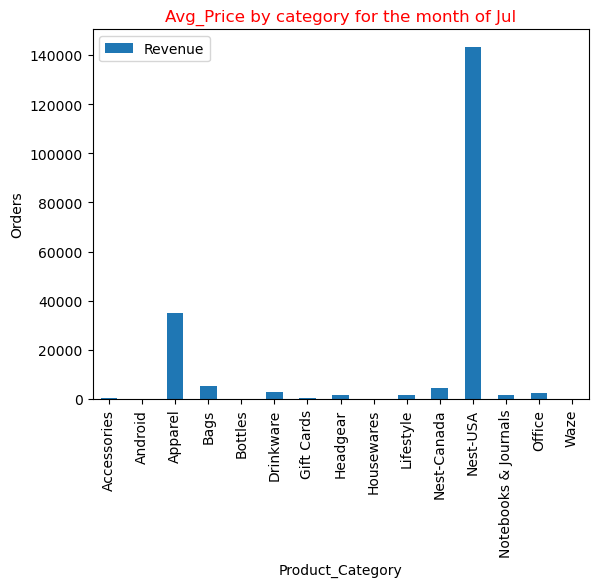

In [53]:
for i in master['Transaction_month'].unique():
    plt.figure()
    x=master.loc[(master['Transaction_month'] == i)]
    x.groupby(by=['Product_Category']).agg(Revenue = ('Avg_Price',sum)).plot(kind='bar')
    plt.title(f"Avg_Price by category for the month of {i}",c='r')
    plt.ylabel("Orders")
    plt.show()

In [54]:
master.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Transaction_month', 'Month', 'Product_Category ',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'GST', 'Invoice_value', 'first_tran_date', 'new/old_flag',
       'Invoice_value_no_disc', 'Discount_amount'],
      dtype='object')

#### Understand the trends/seasonality of sales by category, location, month etc…

<Figure size 640x480 with 0 Axes>

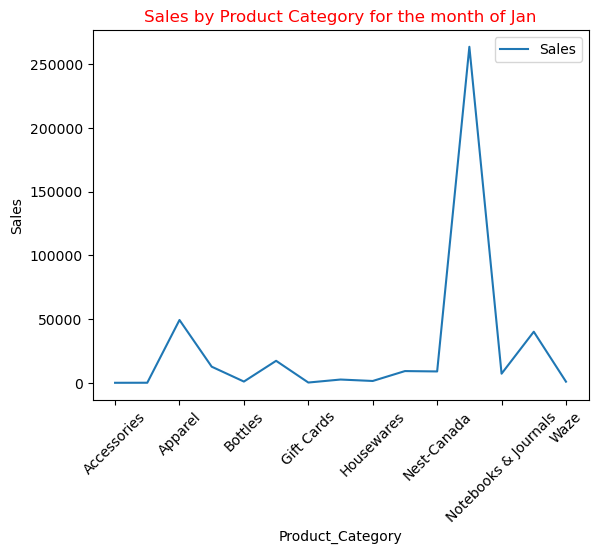

<Figure size 640x480 with 0 Axes>

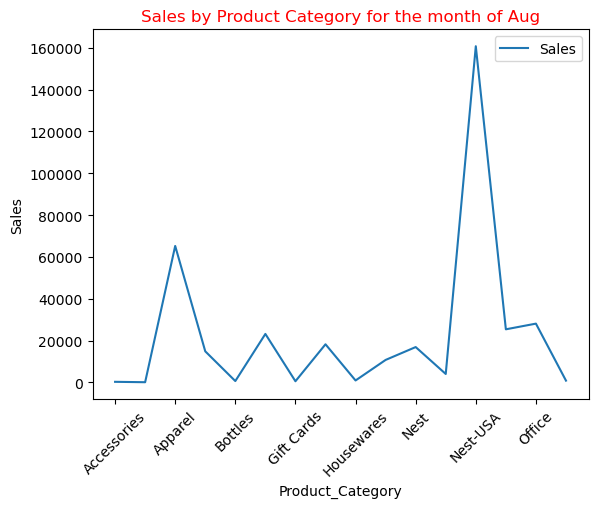

<Figure size 640x480 with 0 Axes>

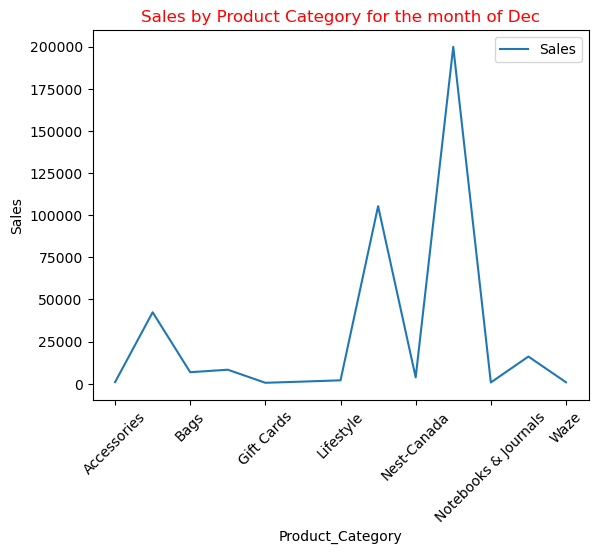

<Figure size 640x480 with 0 Axes>

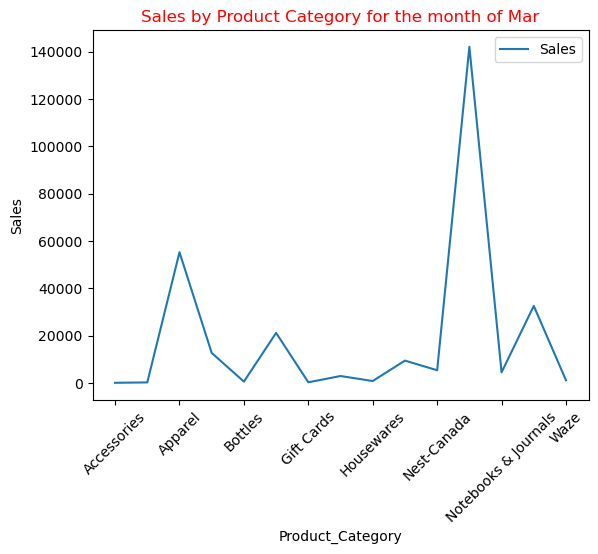

<Figure size 640x480 with 0 Axes>

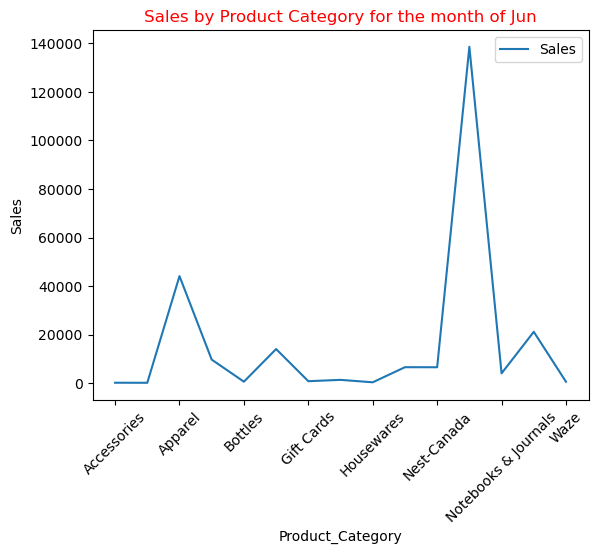

<Figure size 640x480 with 0 Axes>

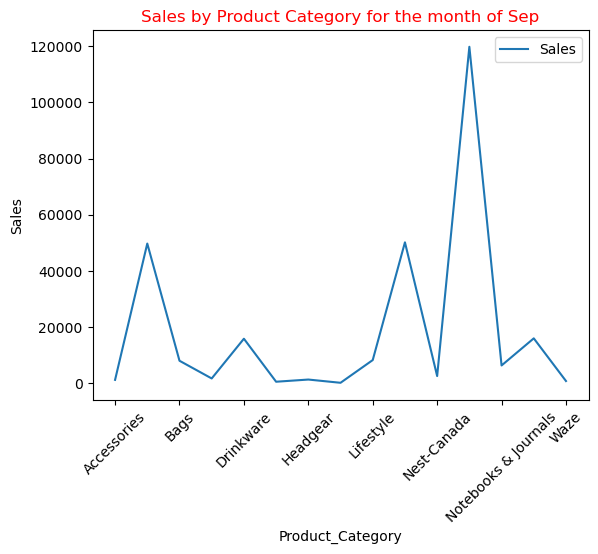

<Figure size 640x480 with 0 Axes>

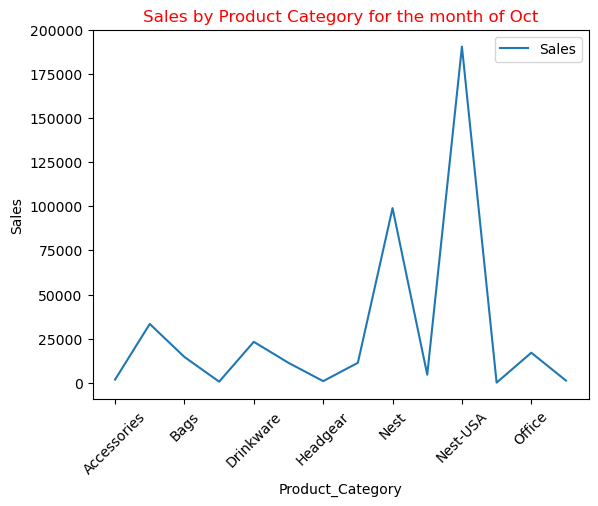

<Figure size 640x480 with 0 Axes>

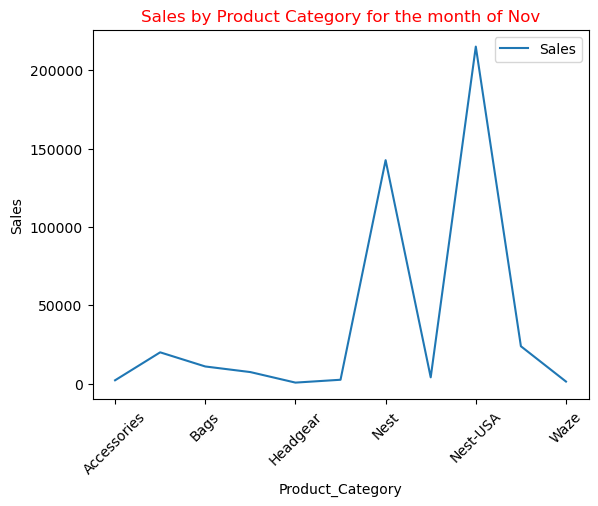

<Figure size 640x480 with 0 Axes>

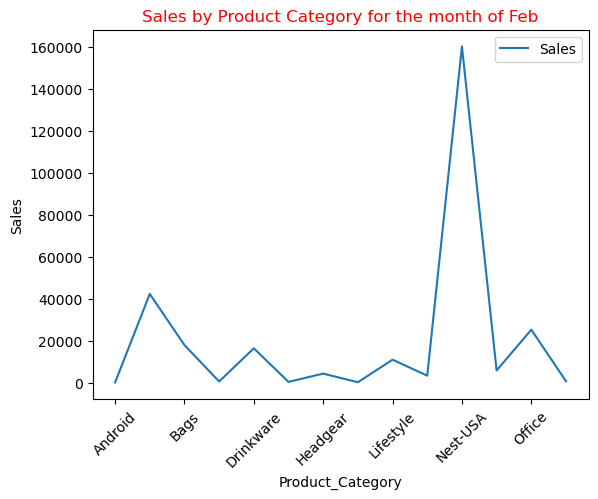

<Figure size 640x480 with 0 Axes>

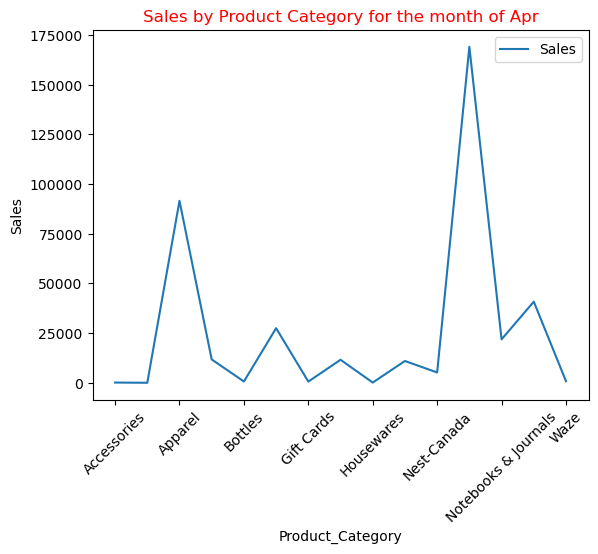

<Figure size 640x480 with 0 Axes>

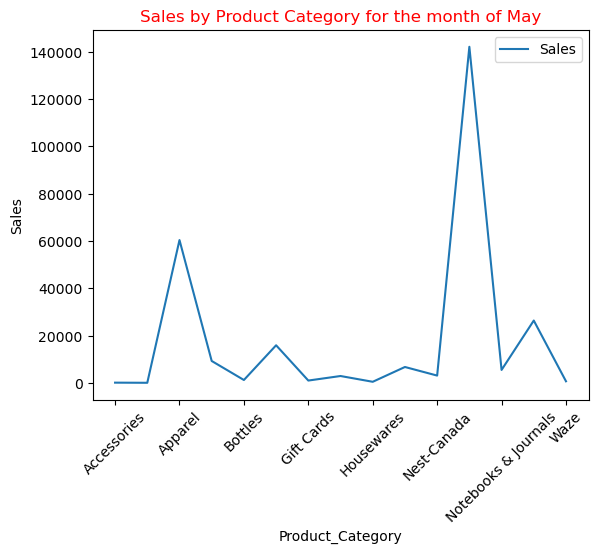

<Figure size 640x480 with 0 Axes>

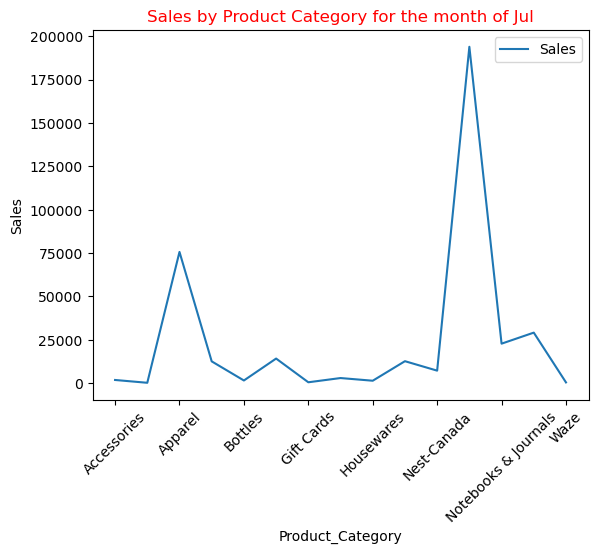

In [55]:
for i in master['Transaction_month'].unique():
    plt.figure()
    x=master.loc[(master['Transaction_month'] == i)]
    x.groupby(by=['Product_Category']).agg(Sales = ('Invoice_value',sum)).plot(kind='line')
    plt.title(f"Sales by Product Category for the month of {i}",c='r')
    plt.ylabel("Sales")
    plt.xticks(rotation = 45)
    plt.show()

#### Products categories like NEST-CANADA and NEST-USA have high sales throughot the year followed by Appearl.

<Figure size 640x480 with 0 Axes>

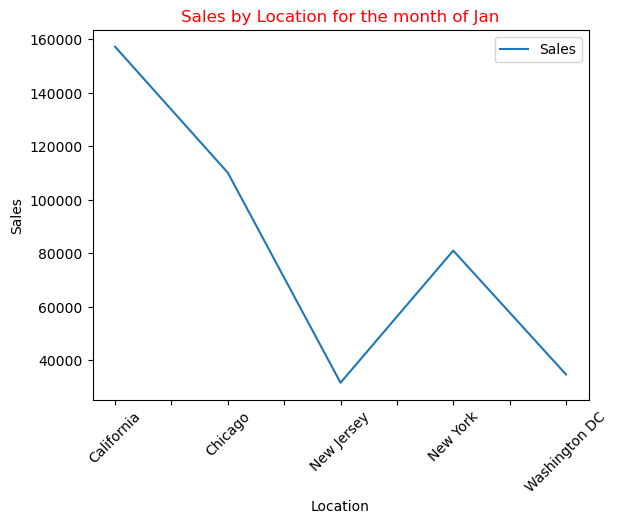

<Figure size 640x480 with 0 Axes>

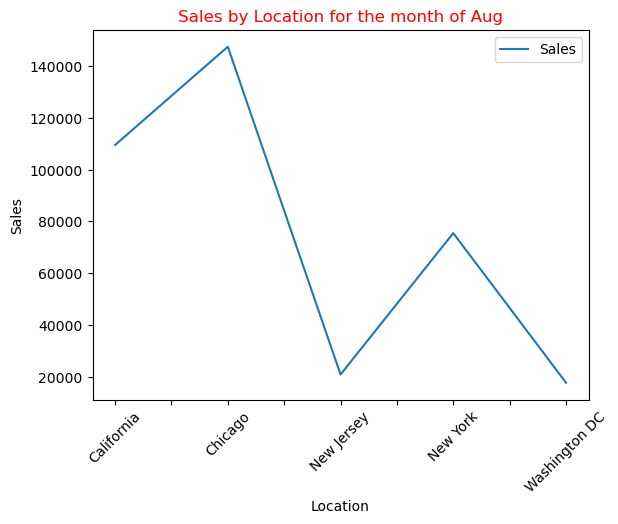

<Figure size 640x480 with 0 Axes>

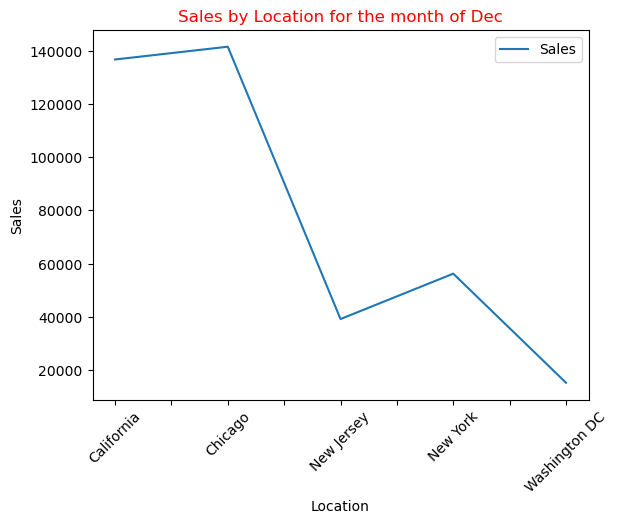

<Figure size 640x480 with 0 Axes>

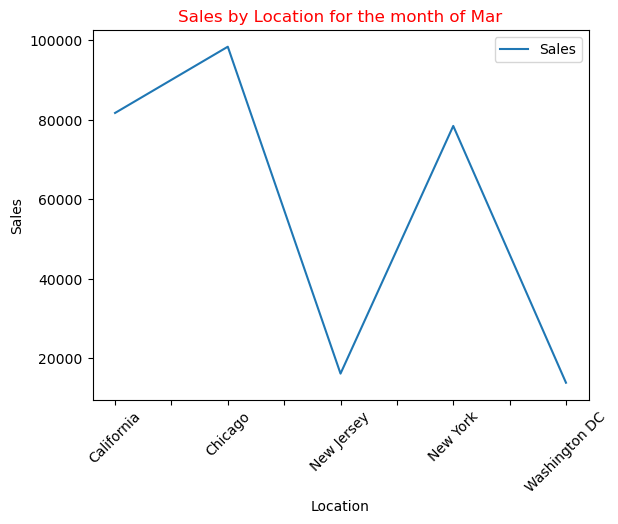

<Figure size 640x480 with 0 Axes>

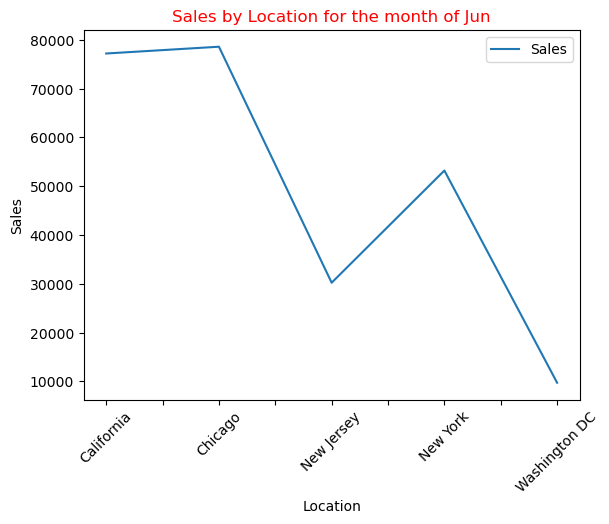

<Figure size 640x480 with 0 Axes>

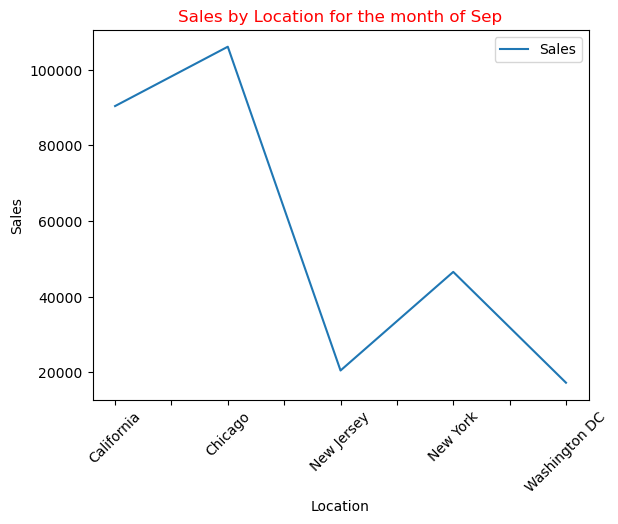

<Figure size 640x480 with 0 Axes>

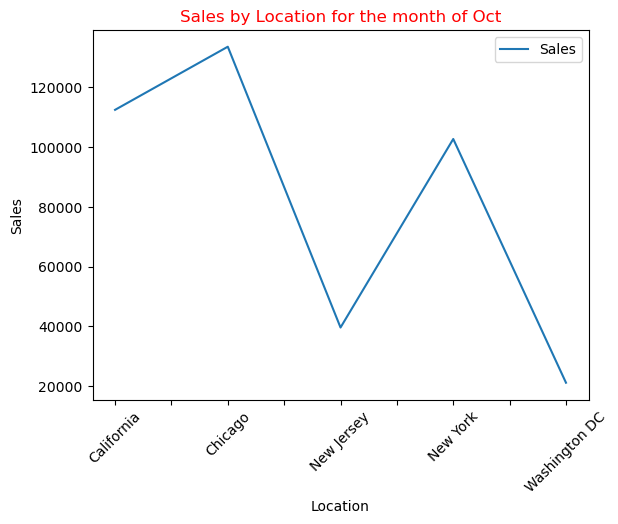

<Figure size 640x480 with 0 Axes>

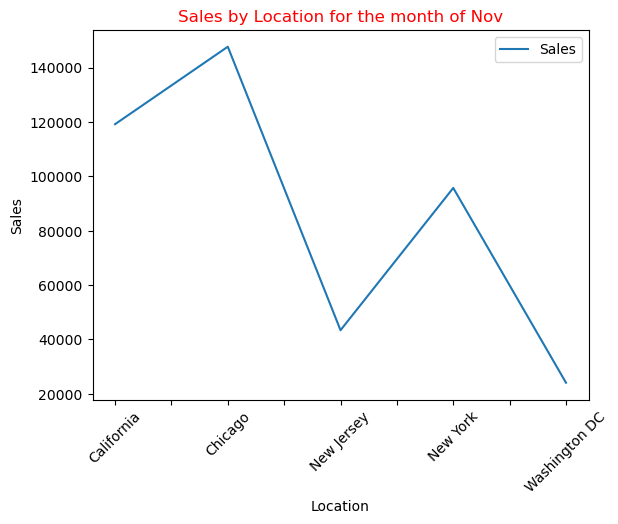

<Figure size 640x480 with 0 Axes>

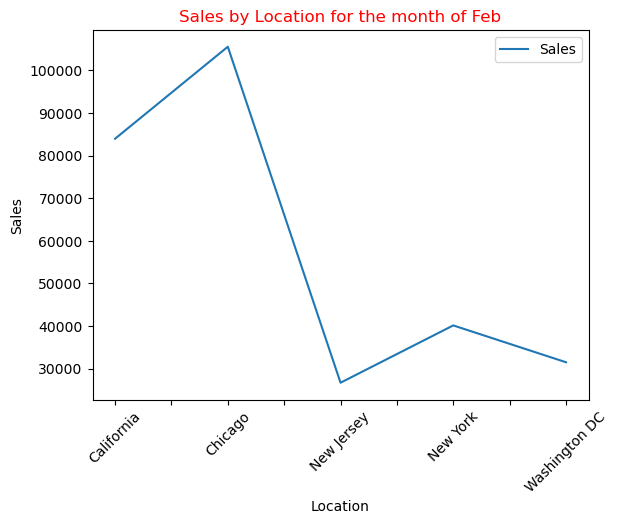

<Figure size 640x480 with 0 Axes>

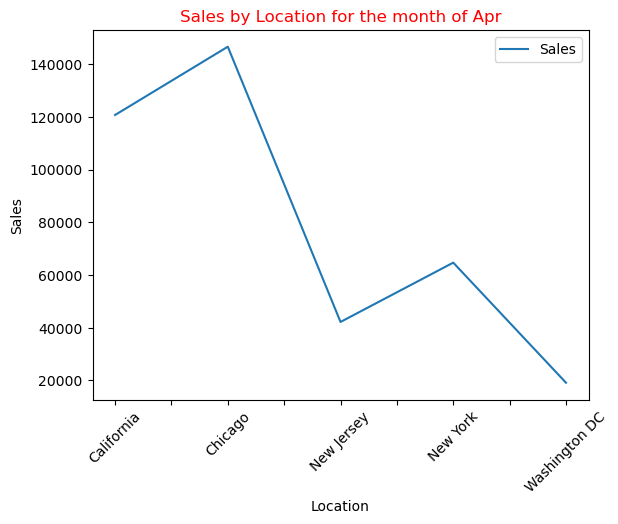

<Figure size 640x480 with 0 Axes>

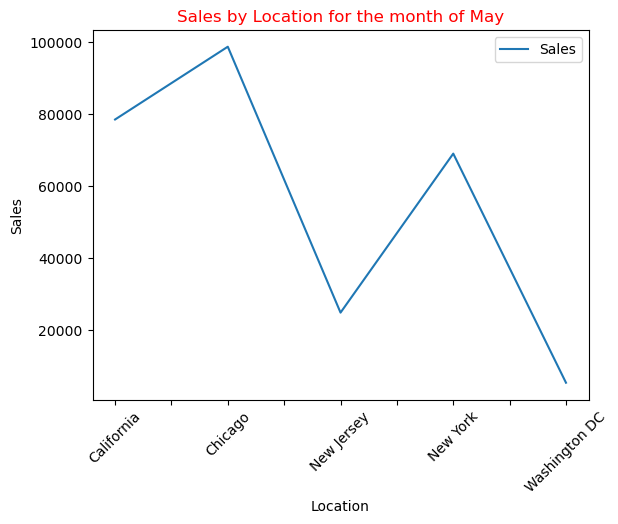

<Figure size 640x480 with 0 Axes>

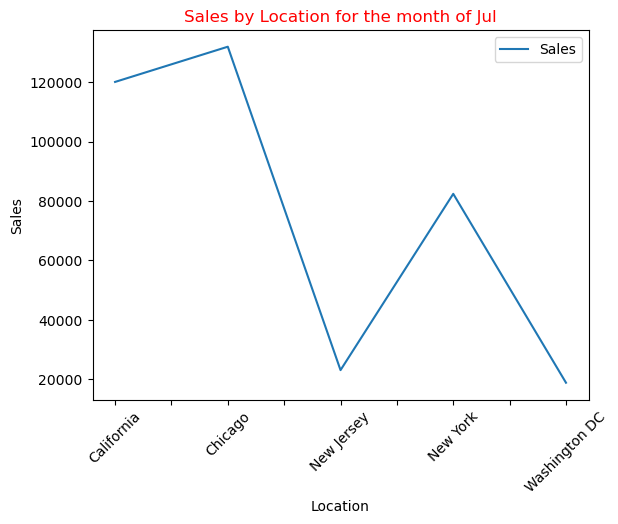

In [56]:
for i in master['Transaction_month'].unique():
    plt.figure()
    x=master.loc[(master['Transaction_month'] == i)]
    x.groupby(by=['Location']).agg(Sales = ('Invoice_value',sum)).plot(kind='line')
    plt.title(f"Sales by Location for the month of {i}",c='r')
    plt.ylabel("Sales")
    plt.xticks(rotation = 45)
    plt.show()

#### How number order varies and sales with different days?

In [57]:
master['Transaction_Day'] = master['Transaction_Date'].dt.strftime('%A')

In [58]:
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [59]:
y=master.groupby(by=['Transaction_Day']).agg(Orders = ('Transaction_ID','count')).loc[days]


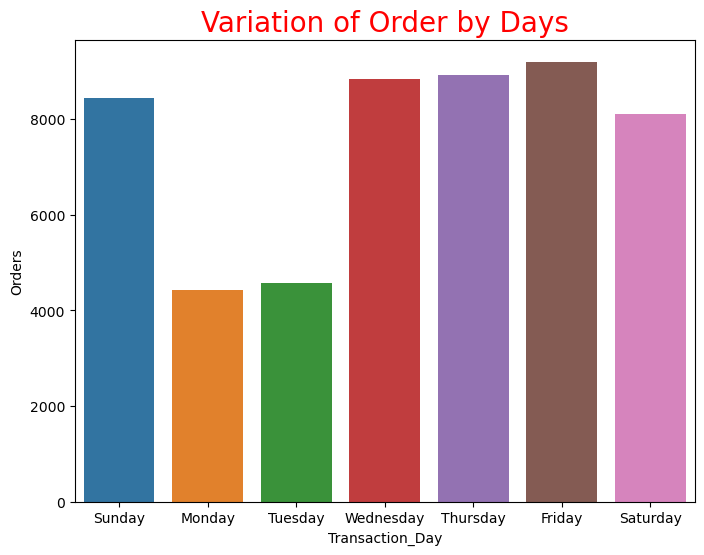

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(data= y , x=y.index , y=y.Orders)
plt.title("Variation of Order by Days",c='r',fontsize = 20)
plt.show()

#### From the above plot we can conclude that orders are high on Friday followed by Sunday whear as very few orders come on Monday and Tuesday.

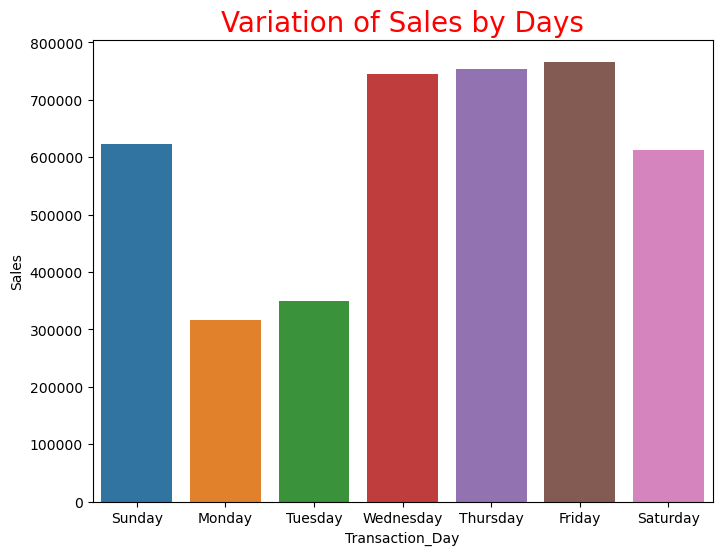

In [61]:
y=master.groupby(by=['Transaction_Day']).agg(Sales = ('Invoice_value',sum)).loc[days]

plt.figure(figsize=(8,6))
sns.barplot(data= y , x=y.index , y=y.Sales)
plt.title("Variation of Sales by Days",c='r',fontsize = 20)
plt.show()

#### Our week starts with very less profit but towards the end of week our sales increase.

#### Calculated the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [62]:
master['market_spend'] = master['Offline_Spend'] + master['Online_Spend']

In [63]:
master['delivery_charge_percentage'] = ( master['Delivery_Charges']/master['Invoice_value'] ) * 100

In [64]:
data = master.groupby(by='Month').agg(Marketing_Spends = ('market_spend',sum)).loc[months]

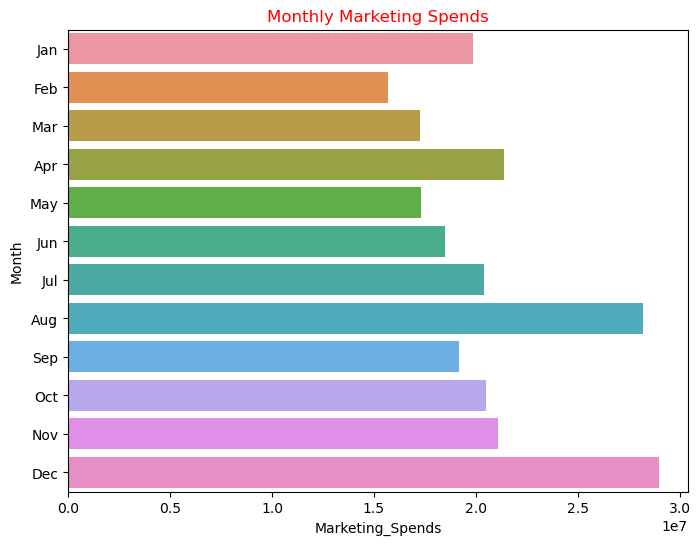

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(data = data , x=data.Marketing_Spends , y = data.index)
plt.title("Monthly Marketing Spends",c='r')
plt.show()

#### Marketing spends in the months of Aug and Dec are quite high as compare to rest of the months.

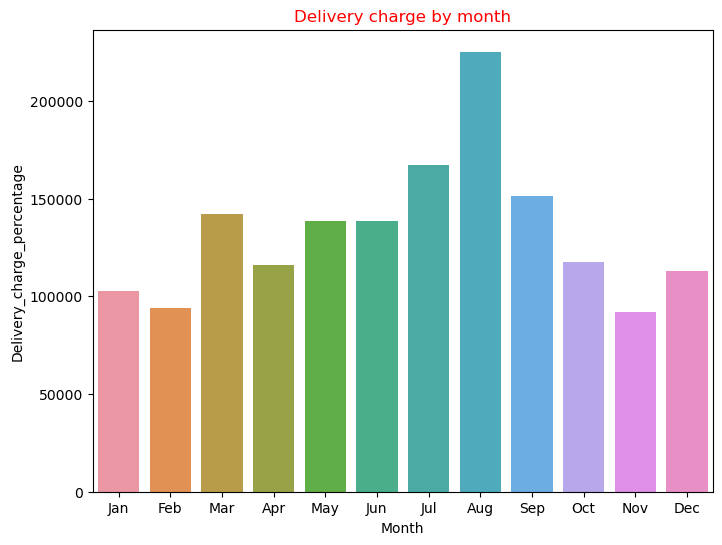

In [66]:
data = master.groupby(by='Month').agg(Delivery_charge_percentage = ('delivery_charge_percentage',sum)).loc[months]
plt.figure(figsize=(8,6))
sns.barplot(data = data , y=data.Delivery_charge_percentage , x= data.index)
plt.title("Delivery charge by month",c='r')
plt.show()

#### Delivery cahrges increases in second and 3rd quarter then it decreases in last and firest quarter of the year.

#### Finding relationship between marketing spends and revenue

In [67]:
data = master.groupby(by='Month').agg(revenue = ('Invoice_value',sum),marketing_spends = ('market_spend',sum)).loc[months]
data.head(3)

revenue  marketing_spends
Month                                
Jan    414824.88195       19853302.29
Feb    287808.83320       15665166.09
Mar    288611.15653       17242967.48

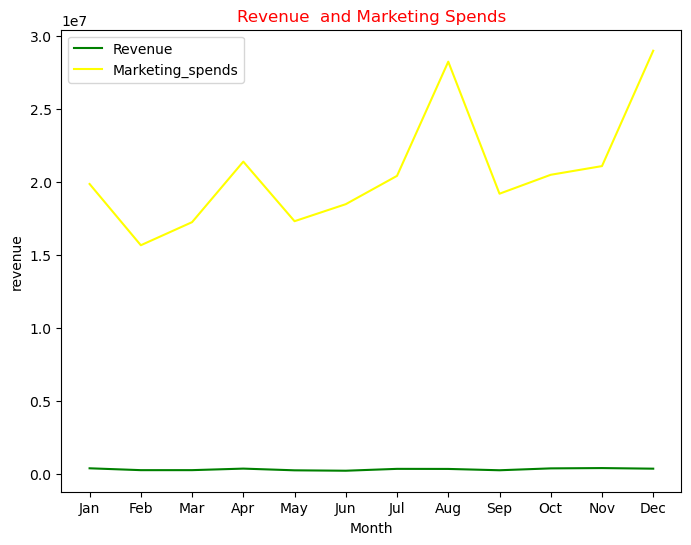

In [68]:
plt.figure(figsize=(8,6))
sns.lineplot(data = data , y=data.revenue , x=data.index,c='green',label = "Revenue")
sns.lineplot(data = data , y=data.marketing_spends , x=data.index,c='yellow',label = "Marketing_spends")
plt.title("Revenue  and Marketing Spends",c='r')
plt.show()

#### There is a significant increase in market spends after every 3 months where as there is no change in sales.

#### Most appearing product in transations

In [69]:
master['Product_SKU'].value_counts().head(10)

Product_SKU
GGOENEBJ079499    3511
GGOENEBQ078999    3328
GGOENEBB078899    3230
GGOENEBQ079099    1361
GGOENEBQ084699    1089
GGOENEBQ079199    1065
GGOENEBQ086799     844
GGOEGFKQ020399     806
GGOENEBQ086499     599
GGOEGDHC018299     583
Name: count, dtype: int64

#### Product which was purchased mostly based on the quantity

In [70]:
master.groupby(by='Product_SKU').agg(Quantity =('Quantity',sum)).sort_values(by='Quantity',ascending=False).head(20)

Quantity
Product_SKU             
GGOEGGOA017399     16234
GGOEGDHC018299      9728
GGOEGBMJ013399      7321
GGOEGOLC014299      6496
GGOEGFKQ020399      5847
GGOEGFSR022099      5549
GGOENEBQ078999      5206
GGOEGFYQ016599      5098
GGOEGOAQ012899      4861
GGOENEBJ079499      4570
GGOEGDHR018499      4554
GGOENEBB078899      4402
GGOEGOAQ020099      4394
GGOEGOCB017499      3741
GGOEGOAC021799      3576
GGOEGHGH019699      3463
GGOEGOCR017899      3263
GGOEAKDH019899      3066
GGOEGBJC019999      2956
GGOEGHGC019799      2922

### Performing Customer Segmentation
Heuristic (Value based, RFM) – Dividing the customers into Premium, Gold, Silver,
Standard customers and define strategy on the same.

In [71]:
master['Last_transaction']=master.groupby(by='CustomerID')['Transaction_Date'].transform(max)

In [72]:
master['Last_transaction'] = pd.to_datetime(master['Last_transaction'])

In [73]:
today = master['Last_transaction'].max()

In [74]:
master['recency'] =today - master['Last_transaction']

In [75]:
master['recency']=pd.to_numeric(master['recency'].astype(str).str.replace(" days",""))

In [76]:
q1 = master['recency'].quantile(0.25)
q2 = master['recency'].quantile(0.50)
q3 = master['recency'].quantile(0.75)

In [77]:
master['recency_score'] = np.where(master['recency'] <= q1, 4,
                                   np.where(master['recency'] <= q2, 3,
                                            np.where(master['recency'] <= q3, 2, 1)))


In [78]:
x=master.groupby(by='CustomerID').agg(frequency = ('Transaction_ID','count')).reset_index()
x.head()

CustomerID  frequency
0       12346          2
1       12347         59
2       12348         23
3       12350         17
4       12356         36

In [79]:
master = pd.merge(left = master,right = x,left_on ='CustomerID',right_on = 'CustomerID',how='inner')

In [80]:
q1 = master['frequency'].quantile(0.25)
q2 = master['frequency'].quantile(0.50)
q3 = master['frequency'].quantile(0.75)

In [81]:
master['frequency_score'] = np.where(master['frequency'] <= q1, 1,
                                   np.where(master['frequency'] <= q2, 2,
                                            np.where(master['frequency'] <= q3, 3, 4)))


In [82]:
x=master.groupby(by='CustomerID').agg(Monetary_value = ('Invoice_value',sum)).reset_index()

In [83]:
master = pd.merge(left = master,right = x,left_on ='CustomerID',right_on = 'CustomerID',how='inner')

In [84]:
master.head()

CustomerID Gender Location  Tenure_Months  Transaction_ID Transaction_Date  \
0       17850      M  Chicago             12           16679       2019-01-01   
1       17850      M  Chicago             12           16680       2019-01-01   
2       17850      M  Chicago             12           16696       2019-01-01   
3       17850      M  Chicago             12           16699       2019-01-01   
4       17850      M  Chicago             12           16700       2019-01-01   

      Product_SKU                                Product_Description  \
0  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
1  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
2  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
3  GGOENEBQ079099    Nest Protect Smoke + CO White Battery Alarm-USA   
4  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   

  Product_Category  Quantity  ...  Discount_amount  Transaction_Day  \
0         Nest-USA         1  ...              0.1          Tuesday   
1         Nest-USA         1  ...              0.1          Tuesday   
2         Nest-USA         2  ...              0.1          Tuesday   
3         Nest-USA         1  ...              0.1          Tuesday   
4         Nest-USA         1  ...              0.1          Tuesday   

  market_spend delivery_charge_percentage Last_transaction recency  \
0       6924.5                   4.535878       2019-01-26     339   
1       6924.5                   4.535878       2019-01-26     339   
2       6924.5                   2.888496       2019-01-26     339   
3       6924.5                   8.224204       2019-01-26     339   
4       6924.5                   4.535878       2019-01-26     339   

  recency_score  frequency frequency_score  Monetary_value  
0             1        293               4     33699.21091  
1             1        293               4     33699.21091  
2             1        293               4     33699.21091  
3             1        293               4     33699.21091  
4             1        293               4     33699.21091  

[5 rows x 36 columns]

In [85]:
q1 = master['Monetary_value'].quantile(0.25)
q2 = master['Monetary_value'].quantile(0.50)
q3 = master['Monetary_value'].quantile(0.75)

In [86]:
master['Monetary_value_score'] = np.where(master['Monetary_value'] <= q1, 1,
                                   np.where(master['Monetary_value'] <= q2, 2,
                                            np.where(master['Monetary_value'] <= q3, 3, 4)))


In [87]:
master['RFM_score'] = master['recency_score'] + master['frequency_score'] + master['Monetary_value_score']

In [88]:
RFM = master[['CustomerID','recency','frequency','Monetary_value','recency_score','frequency_score','Monetary_value_score','RFM_score']]

In [89]:
RFM=RFM.drop_duplicates(subset='CustomerID',keep='first')
RFM

CustomerID  recency  frequency  Monetary_value  recency_score  \
0           17850      339        293     33699.21091              1   
293         13047       13         44      2564.59389              4   
337         12583      151         42      2677.33504              2   
379         15100      123          6       798.52344              2   
385         14688       32         57      6212.35579              4   
...           ...      ...        ...             ...            ...   
52516       13029      172          1        14.94105              2   
52517       12503      157          1        15.51385              2   
52518       12990       17          3       400.73675              4   
52521       16333       15          2       427.76065              4   
52523       15797       75          1       184.10500              3   

       frequency_score  Monetary_value_score  RFM_score  
0                    4                     4          9  
293                  2                     2          8  
337                  2                     2          6  
379                  1                     1          4  
385                  2                     3          9  
...                ...                   ...        ...  
52516                1                     1          4  
52517                1                     1          4  
52518                1                     1          6  
52521                1                     1          6  
52523                1                     1          5  

[1468 rows x 8 columns]

In [90]:
RFM=RFM.sort_values(by=['RFM_score'],ascending=False)

In [91]:
RFM.head()

CustomerID  recency  frequency  Monetary_value  recency_score  \
21814       12682       20        127     10729.88105              4   
18994       13488       11        149      9232.18865              4   
24865       15358       28        120      9754.93965              4   
24618       15808        1        209     21596.94230              4   
23700       12471       15        127     12090.48993              4   

       frequency_score  Monetary_value_score  RFM_score  
21814                4                     4         12  
18994                4                     4         12  
24865                4                     4         12  
24618                4                     4         12  
23700                4                     4         12

In [92]:
RFM['Segemnt'] = np.where(RFM['RFM_score'] <3 ,"Standard",
                         np.where((RFM['RFM_score'] >=3) & (RFM['RFM_score'] <6),"Silver",
                                  np.where((RFM['RFM_score'] >=6) & (RFM['RFM_score'] <=9),"Gold","Premium"
                                 )))

In [93]:
RFM

CustomerID  recency  frequency  Monetary_value  recency_score  \
21814       12682       20        127     10729.88105              4   
18994       13488       11        149      9232.18865              4   
24865       15358       28        120      9754.93965              4   
24618       15808        1        209     21596.94230              4   
23700       12471       15        127     12090.48993              4   
...           ...      ...        ...             ...            ...   
46648       15996      266         32       945.14819              1   
46641       17076      252          7       996.21314              1   
46568       16062      248          7       582.14014              1   
46512       14037      248         26      1425.63074              1   
33055       16743      199         29      1761.36719              1   

       frequency_score  Monetary_value_score  RFM_score  Segemnt  
21814                4                     4         12  Premium  
18994                4                     4         12  Premium  
24865                4                     4         12  Premium  
24618                4                     4         12  Premium  
23700                4                     4         12  Premium  
...                ...                   ...        ...      ...  
46648                1                     1          3   Silver  
46641                1                     1          3   Silver  
46568                1                     1          3   Silver  
46512                1                     1          3   Silver  
33055                1                     1          3   Silver  

[1468 rows x 9 columns]

### Scientific (Using K-Means) & Understand the profiles. Defining strategy for each segment.

In [94]:
num=master.select_dtypes(exclude='object')

In [95]:
num.duplicated().sum()

4903

In [96]:
num.drop_duplicates(inplace=True)

In [97]:
num=num.drop(columns=['CustomerID','Transaction_ID','Transaction_Date','Date','Offline_Spend','Online_Spend','first_tran_date'
                 ,'Discount_pct','Last_transaction','delivery_charge_percentage','recency_score','frequency_score','Monetary_value_score', 'RFM_score'])

In [98]:
col = num.columns

In [99]:
pipe1=make_pipeline(RobustScaler(),KMeans(n_clusters=4))

In [100]:
pipe1.fit(master[col])

C:\Users\sudhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kmeans', KMeans(n_clusters=4))])

In [101]:
master['K_means_labels'] = pipe1.named_steps['kmeans'].labels_

In [102]:
#Evaluating the clusters

In [103]:
silhouette_score(master[col],master['K_means_labels'])

0.049871815301052

In [104]:
pipe1.named_steps['kmeans'].inertia_

23738477.272239797

In [105]:
label_0=master.loc[master['K_means_labels']==0]
label_1=master.loc[master['K_means_labels']==1]
label_2=master.loc[master['K_means_labels']==2]
label_3=master.loc[master['K_means_labels']==3]

In [106]:
label_0.describe().T

count                           mean  \
CustomerID                  50643.0                   15340.069111   
Tenure_Months               50643.0                      26.181012   
Transaction_ID              50643.0                   32602.417768   
Transaction_Date              50643  2019-07-08 01:33:58.528523008   
Quantity                    50643.0                       3.374662   
Avg_Price                   50643.0                      53.870141   
Delivery_Charges            50643.0                       7.887652   
Discount_pct                50643.0                      19.968209   
Date                          50643  2019-07-08 01:33:58.528523008   
Offline_Spend               50643.0                     2837.44249   
Online_Spend                50643.0                    1895.959134   
GST                         50643.0                       0.137156   
Invoice_value               50643.0                      73.618278   
first_tran_date               50643  2019-05-07 09:06:40.710858496   
Invoice_value_no_disc       50643.0                      73.418596   
Discount_amount             50643.0                       0.199682   
market_spend                50643.0                    4733.401624   
delivery_charge_percentage  50643.0                      29.346917   
Last_transaction              50643  2019-09-07 15:42:25.654878464   
recency                     50643.0                     114.345536   
recency_score               50643.0                       2.517564   
frequency                   50643.0                     106.291728   
frequency_score             50643.0                       2.495172   
Monetary_value              50643.0                    8797.959223   
Monetary_value_score        50643.0                       2.490038   
RFM_score                   50643.0                       7.502774   
K_means_labels              50643.0                            0.0   

                                            min                  25%  \
CustomerID                              12347.0              13854.0   
Tenure_Months                               2.0                 15.0   
Transaction_ID                          16679.0              25673.0   
Transaction_Date            2019-01-01 00:00:00  2019-04-16 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 5.99   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 10.0   
Date                        2019-01-01 00:00:00  2019-04-16 00:00:00   
Offline_Spend                             500.0               2500.0   
Online_Spend                             320.25              1253.24   
GST                                        0.05                  0.1   
Invoice_value                           3.63384              16.0848   
first_tran_date             2019-01-01 00:00:00  2019-02-10 00:00:00   
Invoice_value_no_disc                   3.53384              15.8944   
Discount_amount                             0.1                  0.1   
market_spend                             820.25               3862.1   
delivery_charge_percentage                  0.0             6.113044   
Last_transaction            2019-01-01 00:00:00  2019-07-12 00:00:00   
recency                                     0.0                 32.0   
recency_score                               1.0                  2.0   
frequency                                   1.0                 33.0   
frequency_score                             1.0                  1.0   
Monetary_value                             6.89            2313.9666   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   3.0                  5.0   
K_means_labels                              0.0                  0.0   

                                            50%     

In [107]:
label_1.describe().T

count                           mean  \
CustomerID                  1681.0                   15557.496133   
Tenure_Months               1681.0                       24.79655   
Transaction_ID              1681.0                   28086.875074   
Transaction_Date              1681  2019-05-15 22:57:27.947650560   
Quantity                    1681.0                      15.577037   
Avg_Price                   1681.0                      14.318602   
Delivery_Charges            1681.0                      68.128334   
Discount_pct                1681.0                      19.839381   
Date                          1681  2019-05-15 22:57:27.947650560   
Offline_Spend               1681.0                     2682.15348   
Online_Spend                1681.0                    1854.646264   
GST                         1681.0                       0.146805   
Invoice_value               1681.0                     151.028004   
first_tran_date               1681  2019-03-29 02:26:29.054134272   
Invoice_value_no_disc       1681.0                      150.82961   
Discount_amount             1681.0                       0.198394   
market_spend                1681.0                    4536.799744   
delivery_charge_percentage  1681.0                      61.592429   
Last_transaction              1681  2019-08-10 13:50:56.038072576   
recency                     1681.0                     142.422963   
recency_score               1681.0                       2.240928   
frequency                   1681.0                     116.712076   
frequency_score             1681.0                       2.534206   
Monetary_value              1681.0                     9966.17319   
Monetary_value_score        1681.0                       2.658537   
RFM_score                   1681.0                        7.43367   
K_means_labels              1681.0                            1.0   

                                            min                  25%  \
CustomerID                              12346.0              14298.0   
Tenure_Months                               2.0                 13.0   
Transaction_ID                          16692.0              21258.0   
Transaction_Date            2019-01-01 00:00:00  2019-02-24 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                  0.39                 2.99   
Delivery_Charges                          35.89                 46.5   
Discount_pct                               10.0                 10.0   
Date                        2019-01-01 00:00:00  2019-02-24 00:00:00   
Offline_Spend                             500.0               2000.0   
Online_Spend                             417.73              1124.95   
GST                                        0.05                  0.1   
Invoice_value                           42.1002               69.341   
first_tran_date             2019-01-01 00:00:00  2019-01-27 00:00:00   
Invoice_value_no_disc                   42.0002               69.141   
Discount_amount                             0.1                  0.1   
market_spend                            1392.67              3655.96   
delivery_charge_percentage             4.355006            41.958544   
Last_transaction            2019-01-03 00:00:00  2019-05-19 00:00:00   
recency                                     0.0                 41.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 36.0   
frequency_score                             1.0                  2.0   
Monetary_value                         121.9652            2989.9026   
Monetary_value_score                        1.0                  2.0   
RFM_score                                   3.0                  5.0   
K_means_labels                              1.0                  1.0   

                                            50%                  75%  \
Custome

In [108]:
label_2.describe().T

count                           mean  \
CustomerID                  104.0                   14673.230769   
Tenure_Months               104.0                      24.923077   
Transaction_ID              104.0                   28080.163462   
Transaction_Date              104  2019-05-16 01:50:46.153846272   
Quantity                    104.0                      46.067308   
Avg_Price                   104.0                      10.939615   
Delivery_Charges            104.0                     322.394423   
Discount_pct                104.0                      16.153846   
Date                          104  2019-05-16 01:50:46.153846272   
Offline_Spend               104.0                    2860.576923   
Online_Spend                104.0                    1543.892404   
GST                         104.0                       0.137788   
Invoice_value               104.0                     511.343103   
first_tran_date               104  2019-05-05 22:09:13.846153728   
Invoice_value_no_disc       104.0                     511.181564   
Discount_amount             104.0                       0.161538   
market_spend                104.0                    4404.469327   
delivery_charge_percentage  104.0                      73.431669   
Last_transaction              104  2019-08-25 04:50:46.153846272   
recency                     104.0                     127.798077   
recency_score               104.0                       2.682692   
frequency                   104.0                     127.682692   
frequency_score             104.0                       2.326923   
Monetary_value              104.0                   14416.070873   
Monetary_value_score        104.0                       3.096154   
RFM_score                   104.0                       8.105769   
K_means_labels              104.0                            2.0   

                                            min                  25%  \
CustomerID                              12433.0              12935.0   
Tenure_Months                               5.0                 22.0   
Transaction_ID                          16909.0              18580.0   
Transaction_Date            2019-01-03 00:00:00  2019-01-23 00:00:00   
Quantity                                    1.0                  2.0   
Avg_Price                                  0.98                  2.8   
Delivery_Charges                          199.9              285.705   
Discount_pct                               10.0                 10.0   
Date                        2019-01-03 00:00:00  2019-01-23 00:00:00   
Offline_Spend                            1000.0               2000.0   
Online_Spend                             515.44                939.9   
GST                                        0.05                  0.1   
Invoice_value                          226.4483              334.584   
first_tran_date             2019-01-03 00:00:00  2019-01-16 00:00:00   
Invoice_value_no_disc                  226.3483              334.484   
Discount_amount                             0.1                  0.1   
market_spend                            1560.02              3498.01   
delivery_charge_percentage            11.957424            57.324784   
Last_transaction            2019-01-03 00:00:00  2019-04-10 00:00:00   
recency                                     0.0                 15.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 26.0   
frequency_score                             1.0                  1.0   
Monetary_value                        504.25354           5744.63524   
Monetary_value_score                        1.0                  3.0   
RFM_score                                   3.0                  7.0   
K_means_labels                              2.0                  2.0   

                                            50%                  75%  \
CustomerID                        

In [109]:
label_3.describe().T

count                 mean                  min  \
CustomerID                  96.0         15143.020833              12433.0   
Tenure_Months               96.0              29.5625                  5.0   
Transaction_ID              96.0         30494.447917              17121.0   
Transaction_Date              96  2019-06-13 13:45:00  2019-01-05 00:00:00   
Quantity                    96.0               359.25                193.0   
Avg_Price                   96.0             4.506354                 0.79   
Delivery_Charges            96.0            28.986979                  6.0   
Discount_pct                96.0               18.125                 10.0   
Date                          96  2019-06-13 13:45:00  2019-01-05 00:00:00   
Offline_Spend               96.0          2788.541667                700.0   
Online_Spend                96.0           2047.28625                484.9   
GST                         96.0             0.119479                 0.05   
Invoice_value               96.0          1366.144526               132.06   
first_tran_date               96  2019-04-20 23:00:00  2019-01-02 00:00:00   
Invoice_value_no_disc       96.0          1365.963276               131.76   
Discount_amount             96.0              0.18125                  0.1   
market_spend                96.0          4835.827917              2080.14   
delivery_charge_percentage  96.0             5.415709             0.072195   
Last_transaction              96  2019-09-04 18:30:00  2019-01-05 00:00:00   
recency                     96.0           117.229167                  0.0   
recency_score               96.0              2.59375                  1.0   
frequency                   96.0           136.666667                  9.0   
frequency_score             96.0                2.625                  1.0   
Monetary_value              96.0         15582.410958            895.38132   
Monetary_value_score        96.0              3.09375                  1.0   
RFM_score                   96.0               8.3125                  3.0   
K_means_labels              96.0                  3.0                  3.0   

                                            25%                  50%  \
CustomerID                             13417.75              15152.5   
Tenure_Months                             21.75                 30.0   
Transaction_ID                         24862.25              30582.0   
Transaction_Date            2019-04-05 00:00:00  2019-06-16 12:00:00   
Quantity                                 217.75                300.0   
Avg_Price                                1.2375                 2.99   
Delivery_Charges                            6.0                  6.5   
Discount_pct                               10.0                 20.0   
Date                        2019-04-05 00:00:00  2019-06-16 12:00:00   
Offline_Spend                            2500.0               2750.0   
Online_Spend                            1358.66             2149.675   
GST                                         0.1                  0.1   
Invoice_value                         366.29745            613.41075   
first_tran_date             2019-01-23 00:00:00  2019-03-19 12:00:00   
Invoice_value_no_disc                 366.17245            613.16075   
Discount_amount                             0.1                  0.2   
market_spend                           3821.565              4842.68   
delivery_charge_percentage             0.611047             1.729529   
Last_transaction            2019-07-23 06:00:00  2019-09-24 12:00:00   
recency                                    19.0                 97.5   
recency_score                               2.0                  2.5   
frequency                                  46.0                 69.0   
frequency_score                             2.0                  3.0   
Monetary_value                       3985.41958          9373.992845   
Monetary_value_score                      

#### By observing the mean of Monetary_value of all the label we can say that label 3 is Platinum , label 2 is for Gold , lebel 1 is for silver and label 0 is for Standard Profiles of customers.

#### Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

In [110]:
q1 = master['RFM_score'].quantile(0.33)
q2 = master['RFM_score'].quantile(0.66)

In [111]:
master['CLV_RFM'] = np.where((master['RFM_score']<q1),"Low value",
                            np.where((master['RFM_score']>=q1) & (master['RFM_score']<q2),"Medium value","High Value"))

In [112]:
master.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Transaction_month', 'Month', 'Product_Category ',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'GST', 'Invoice_value', 'first_tran_date', 'new/old_flag',
       'Invoice_value_no_disc', 'Discount_amount', 'Transaction_Day',
       'market_spend', 'delivery_charge_percentage', 'Last_transaction',
       'recency', 'recency_score', 'frequency', 'frequency_score',
       'Monetary_value', 'Monetary_value_score', 'RFM_score', 'K_means_labels',
       'CLV_RFM'],
      dtype='object')

In [113]:
#Keeping columns relevance to predicting customer lifetime value.

In [114]:
df=master[['recency','frequency','Monetary_value','Tenure_Months','Coupon_Status','Avg_Price','Delivery_Charges','Discount_amount'
       ,'Product_Category ','Invoice_value','Gender','CLV_RFM']]

In [115]:
#Checking missing values
df.isnull().sum().sum()

0

In [116]:
df['CLV_RFM'].value_counts(normalize=True)

CLV_RFM
High Value      0.369812
Medium value    0.363948
Low value       0.266240
Name: proportion, dtype: float64

In [117]:
#dataset is slighly imbalance

In [118]:
num = df.select_dtypes(exclude='object').columns
cat = df.select_dtypes(include='object').columns

In [119]:
print("Numer of Cumerical Columns", len(num))
print("Numer of Categorical Columns", len(cat))


Numer of Cumerical Columns 8
Numer of Categorical Columns 4


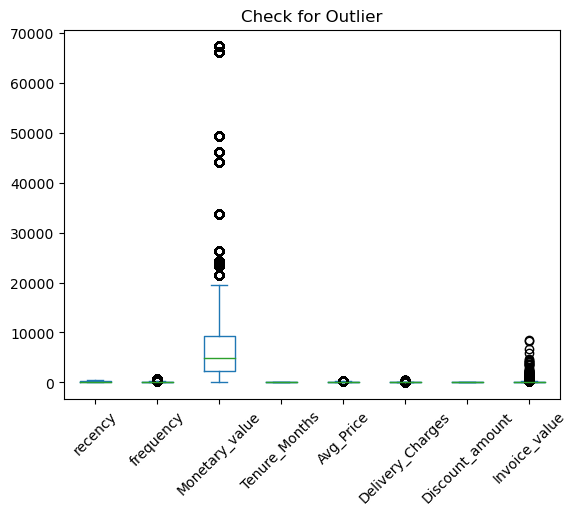

In [120]:
#checking outlier
df[num].plot(kind='box')
plt.title("Check for Outlier")
plt.xticks(rotation = 45)
plt.show()

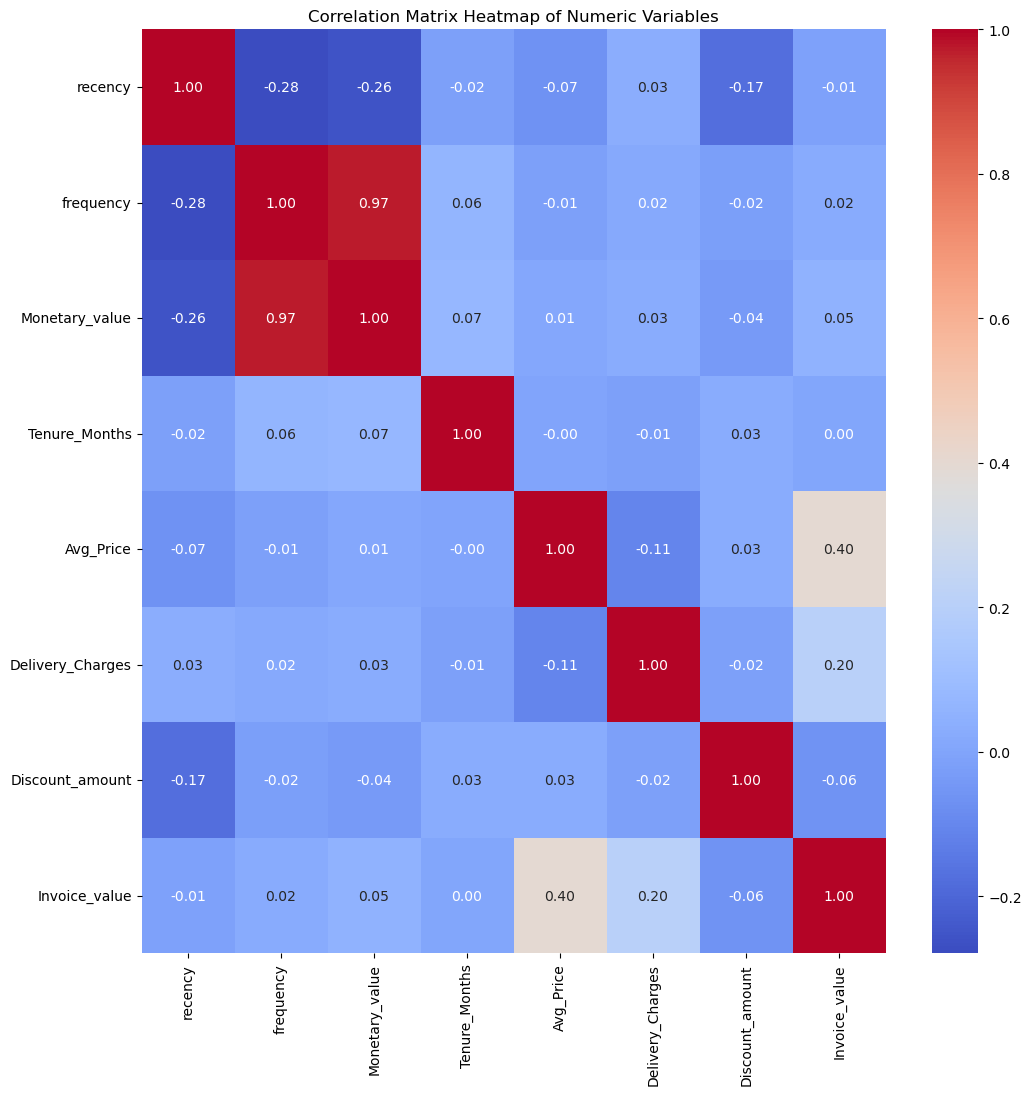

In [121]:
corr= df[num].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f',annot=True)
plt.title('Correlation Matrix Heatmap of Numeric Variables')
plt.show()

In [123]:
#Defineing X and Y
X = df.drop(columns='CLV_RFM')
y = df['CLV_RFM']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [125]:
num= X.select_dtypes(exclude='object').columns
cat= X.select_dtypes(include='object').columns


In [126]:
rbs=RobustScaler()
ohe = OneHotEncoder(drop='first')
rfc = RandomForestClassifier()

In [127]:
ct = make_column_transformer((rbs,num),
                            (ohe,cat))

In [128]:
pipe2 = make_pipeline(ct,rfc)

In [129]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  Index(['recency', 'frequency', 'Monetary_value', 'Tenure_Months', 'Avg_Price',
       'Delivery_Charges', 'Discount_amount', 'Invoice_value'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Coupon_Status', 'Product_Category ', 'Gender'], dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [130]:
train_preds_pipe2 = pipe2.predict(X_train)
test_preds_pipe2 = pipe2.predict(X_test)

In [131]:
print("Accuracy train pipe2 :: ",accuracy_score(train_preds_pipe2, y_train))
print("Accuracy test pipe2 :: ",accuracy_score(test_preds_pipe2, y_test))

Accuracy train pipe2 ::  1.0
Accuracy test pipe2 ::  1.0


In [132]:
cv=cross_val_score(estimator=pipe2,X=X,y=y,cv=5)

In [133]:
cv.mean()

0.9410933429226933

In [134]:
print(classification_report(train_preds_pipe2,y_train))

              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00     12998
   Low value       1.00      1.00      1.00      9360
Medium value       1.00      1.00      1.00     12833

    accuracy                           1.00     35191
   macro avg       1.00      1.00      1.00     35191
weighted avg       1.00      1.00      1.00     35191



In [135]:
cm=confusion_matrix(train_preds_pipe2,y_train)

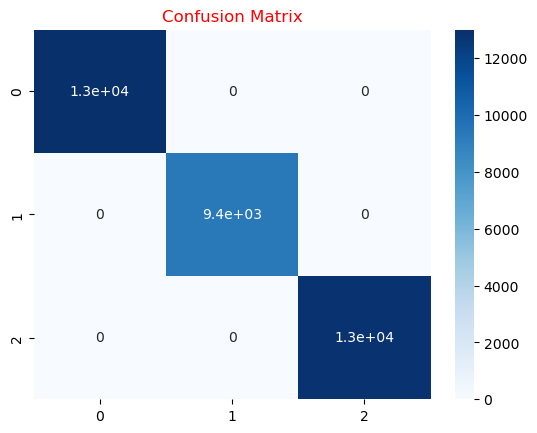

In [136]:
sns.heatmap(data=cm,annot=True,cmap="Blues")
plt.title("Confusion Matrix",c='r')
plt.show()

In [137]:
#From the above evaluation our model is having ac accuracy of 94.1% and is able to predict values correctly.

In [138]:
preds=pipe2.predict(X)

In [139]:
master['CLV_predict'] =preds

In [140]:
master.head(3)

CustomerID Gender Location  Tenure_Months  Transaction_ID Transaction_Date  \
0       17850      M  Chicago             12           16679       2019-01-01   
1       17850      M  Chicago             12           16680       2019-01-01   
2       17850      M  Chicago             12           16696       2019-01-01   

      Product_SKU                                Product_Description  \
0  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
1  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
2  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   

  Product_Category  Quantity  ...  recency  recency_score frequency  \
0         Nest-USA         1  ...      339              1       293   
1         Nest-USA         1  ...      339              1       293   
2         Nest-USA         2  ...      339              1       293   

  frequency_score Monetary_value Monetary_value_score RFM_score  \
0               4    33699.21091                    4         9   
1               4    33699.21091                    4         9   
2               4    33699.21091                    4         9   

   K_means_labels     CLV_RFM  CLV_predict  
0               0  High Value   High Value  
1               0  High Value   High Value  
2               0  High Value   High Value  

[3 rows x 41 columns]

### Cross-Selling (Which products are selling together)

In [141]:
master.head()

CustomerID Gender Location  Tenure_Months  Transaction_ID Transaction_Date  \
0       17850      M  Chicago             12           16679       2019-01-01   
1       17850      M  Chicago             12           16680       2019-01-01   
2       17850      M  Chicago             12           16696       2019-01-01   
3       17850      M  Chicago             12           16699       2019-01-01   
4       17850      M  Chicago             12           16700       2019-01-01   

      Product_SKU                                Product_Description  \
0  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
1  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
2  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
3  GGOENEBQ079099    Nest Protect Smoke + CO White Battery Alarm-USA   
4  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   

  Product_Category  Quantity  ...  recency  recency_score frequency  \
0         Nest-USA         1  ...      339              1       293   
1         Nest-USA         1  ...      339              1       293   
2         Nest-USA         2  ...      339              1       293   
3         Nest-USA         1  ...      339              1       293   
4         Nest-USA         1  ...      339              1       293   

  frequency_score Monetary_value Monetary_value_score RFM_score  \
0               4    33699.21091                    4         9   
1               4    33699.21091                    4         9   
2               4    33699.21091                    4         9   
3               4    33699.21091                    4         9   
4               4    33699.21091                    4         9   

   K_means_labels     CLV_RFM  CLV_predict  
0               0  High Value   High Value  
1               0  High Value   High Value  
2               0  High Value   High Value  
3               0  High Value   High Value  
4               0  High Value   High Value  

[5 rows x 41 columns]

In [142]:
mba = master[['Transaction_ID','Product_Description','Quantity']]

In [143]:
mba['Product_Description'] = mba['Product_Description'].str.strip()

C:\Users\sudhi\AppData\Local\Temp\ipykernel_9148\2189488443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mba['Product_Description'] = mba['Product_Description'].str.strip()


In [144]:
mba['Transaction_ID'] = mba['Transaction_ID'].astype('str')

C:\Users\sudhi\AppData\Local\Temp\ipykernel_9148\3212096529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mba['Transaction_ID'] = mba['Transaction_ID'].astype('str')


In [145]:
basket = mba.groupby(by=['Transaction_ID','Product_Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index("Transaction_ID")

In [146]:
basket.head(3)

Product_Description  1 oz Hand Sanitizer  \
Transaction_ID                             
16679                                0.0   
16680                                0.0   
16681                                0.0   

Product_Description  20 oz Stainless Steel Insulated Tumbler  \
Transaction_ID                                                 
16679                                                    0.0   
16680                                                    0.0   
16681                                                    0.0   

Product_Description  22 oz Android Bottle  22 oz YouTube Bottle Infuser  \
Transaction_ID                                                            
16679                                 0.0                           0.0   
16680                                 0.0                           0.0   
16681                                 0.0                           0.0   

Product_Description  23 oz Wide Mouth Sport Bottle  \
Transaction_ID                                       
16679                                          0.0   
16680                                          0.0   
16681                                          0.0   

Product_Description  24 oz YouTube Sergeant Stripe Bottle  \
Transaction_ID                                              
16679                                                 0.0   
16680                                                 0.0   
16681                                                 0.0   

Product_Description  26 oz Double Wall Insulated Bottle  7&quot; Dog Frisbee  \
Transaction_ID                                                                 
16679                                               0.0                  0.0   
16680                                               0.0                  0.0   
16681                                               0.0                  0.0   

Product_Description  8 pc Android Sticker Sheet  \
Transaction_ID                                    
16679                                       0.0   
16680                                       0.0   
16681                                       0.0   

Product_Description  Android 17oz Stainless Steel Sport Bottle  ...  \
Transaction_ID                                                  ...   
16679                                                      0.0  ...   
16680                                                      0.0  ...   
16681                                                      0.0  ...   

Product_Description  YouTube Twill Cap  YouTube Women's Favorite Tee White  \
Transaction_ID                                                               
16679                              0.0                                 0.0   
16680                              0.0                                 0.0   
16681                              0.0                                 0.0   

Product_Description  YouTube Women's Fleece Hoodie Black  \
Transaction_ID                                             
16679                                                0.0   
16680                                                0.0   
16681                                                0.0   

Product_Description  YouTube Women's Racer Back Tank Black  \
Transaction_ID                                               
16679                                                  0.0   
16680                                                  0.0   
16681                                                  0.0   

Product_Description  YouTube Women's Short Sleeve Hero Tee Charcoal  \
Transaction_ID                                                        
16679                                                           0.0   
16680                                                           0.0   
16681                                                           0.0   

Product_Description  YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal  \
Transaction_ID                                     

In [147]:
#we need to consolidate the items into 1 transaction per row with each product 1 hot encoded.
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [148]:
basket_sets = basket.applymap(encode_units)

In [149]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\sudhi\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [150]:
frequent_itemsets

support                                           itemsets
0  0.12920            (Nest Cam Indoor Security Camera - USA)
1  0.13312           (Nest Cam Outdoor Security Camera - USA)
2  0.14044  (Nest Learning Thermostat 3rd Gen-USA - Stainl...

In [214]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

#### It seems that no products are purchased together.

### Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)

In [151]:
q6=master.groupby(by='CustomerID')['Transaction_Date'].apply(pd.Series)

In [152]:
master.sort_values(by=['CustomerID','Transaction_Date'],inplace = True)

In [153]:
master['Days_Between_Transactions'] = master.groupby('CustomerID')['Transaction_Date'].diff().dt.days

In [154]:
master.head(3)

CustomerID Gender  Location  Tenure_Months  Transaction_ID  \
51716       12346      F  New York             31           38223   
51717       12346      F  New York             31           38223   
26335       12347      M  New York             20           23980   

      Transaction_Date     Product_SKU  \
51716       2019-09-15  GGOEGOAR013099   
51717       2019-09-15  GGOEAAAJ080816   
26335       2019-03-24  GGOENEBJ079499   

                                     Product_Description Product_Category  \
51716                     Google Stylus Pen w/ LED Light           Office   
51717   Android Men's Engineer Short Sleeve Tee Charcoal          Apparel   
26335  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

       Quantity  ...  recency_score  frequency frequency_score Monetary_value  \
51716         2  ...              2          2               1      170.28354   
51717         1  ...              2          2               1      170.28354   
26335         1  ...              3         59               2     9993.50880   

      Monetary_value_score RFM_score K_means_labels     CLV_RFM CLV_predict  \
51716                    1         4              1   Low value   Low value   
51717                    1         4              1   Low value   Low value   
26335                    4         9              0  High Value  High Value   

       Days_Between_Transactions  
51716                        NaN  
51717                        0.0  
26335                        NaN  

[3 rows x 42 columns]

In [155]:
master['Days_Between_Transactions'].fillna(0,inplace=True)

In [156]:
q61=master.groupby(by='CustomerID').agg(Mean_days = ('Days_Between_Transactions','mean'))

In [157]:
master=pd.merge(left=master,right=q61,left_on='CustomerID',right_on='CustomerID',how='inner')

In [158]:
def next_day(avg_days):
    if avg_days <= 30:
        return '0-30 days'
    elif avg_days <= 60:
        return '30-60 days'
    elif avg_days <= 90:
        return '60-90 days'
    else:
        return '90+ days'

In [159]:
master['next_day_category']=master['Mean_days'].apply(next_day)

In [160]:
master.drop(columns=['Mean_days','Days_Between_Transactions'],inplace = True)

In [161]:
#Keeping only relevant columns
col = ['CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Quantity', 'Avg_Price','Coupon_Status', 'Discount_pct','recency', 'frequency', 'Monetary_value', 
       'RFM_score','next_day_category']

In [162]:
X = master[col].drop(columns='next_day_category')
y = master['next_day_category']

In [163]:
num = X.select_dtypes(exclude ='object').columns
cat = X.select_dtypes(include ='object').columns

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [165]:
ct = make_column_transformer((rbs,num),
                            (ohe,cat))

In [166]:
pipe3 = make_pipeline(ct,rfc)

In [167]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  Index(['CustomerID', 'Tenure_Months', 'Quantity', 'Avg_Price', 'Discount_pct',
       'recency', 'frequency', 'Monetary_value', 'RFM_score'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'Location', 'Coupon_Status'], dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [168]:
train_preds_pipe3 = pipe3.predict(X_train)
test_preds_pipe3 = pipe3.predict(X_test)

In [169]:
print("Accuracy train pipe3 :: ",accuracy_score(train_preds_pipe3, y_train))
print("Accuracy test pipe3 :: ",accuracy_score(test_preds_pipe3, y_test))

Accuracy train pipe3 ::  1.0
Accuracy test pipe3 ::  0.9997692263312756


In [170]:
cv=cross_val_score(estimator=pipe3,X=X,y=y,cv=5)

In [171]:
cv.mean()

0.9983816142387496

In [172]:
# From the above evaluation we can colclude that our model have a accuracy of 99.83 %.

In [173]:
preds2 = pipe3.predict(X)

In [174]:
master['predicted_next_day_category'] =preds2

### Performing cohort analysis by defining below cohorts
 Customers who started in each month and understand their behaviour

In [175]:
# Extracted the month of the first transaction for each customer 
master['Acquisition_Month'] = master.groupby('CustomerID')['Transaction_Date'].transform('min').dt.strftime('%b')

In [176]:
master.loc[master['Acquisition_Month']=='Jan'].describe().T

count                           mean  \
CustomerID                  10839.0                   15304.038195   
Tenure_Months               10839.0                      27.636313   
Transaction_ID              10839.0                   27581.825999   
Transaction_Date              10839  2019-05-09 10:48:51.414337024   
Quantity                    10839.0                       5.045945   
Avg_Price                   10839.0                      54.033236   
Delivery_Charges            10839.0                      12.219721   
Discount_pct                10839.0                      16.657441   
Date                          10839  2019-05-09 10:48:51.414337024   
Offline_Spend               10839.0                    2909.410462   
Online_Spend                10839.0                    1892.203358   
GST                         10839.0                        0.13643   
Invoice_value               10839.0                      90.378934   
first_tran_date               10839  2019-01-13 19:20:04.649875456   
Invoice_value_no_disc       10839.0                      90.212359   
Discount_amount             10839.0                       0.166574   
market_spend                10839.0                     4801.61382   
delivery_charge_percentage  10839.0                      29.334747   
Last_transaction              10839  2019-08-30 11:40:00.332133888   
recency                     10839.0                     122.513885   
recency_score               10839.0                       2.655965   
frequency                   10839.0                     220.836147   
frequency_score             10839.0                        2.97878   
Monetary_value              10839.0                   20482.380146   
Monetary_value_score        10839.0                       3.035059   
RFM_score                   10839.0                       8.669803   
K_means_labels              10839.0                       0.061906   

                                            min                  25%  \
CustomerID                              12431.0              14031.0   
Tenure_Months                               2.0                 19.0   
Transaction_ID                          16679.0              18550.5   
Transaction_Date            2019-01-01 00:00:00  2019-01-22 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 5.99   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 10.0   
Date                        2019-01-01 00:00:00  2019-01-22 00:00:00   
Offline_Spend                             500.0               2000.0   
Online_Spend                             320.25              1122.49   
GST                                        0.05                  0.1   
Invoice_value                           3.63384             18.08278   
first_tran_date             2019-01-01 00:00:00  2019-01-06 00:00:00   
Invoice_value_no_disc                   3.53384             17.85718   
Discount_amount                             0.1                  0.1   
market_spend                             820.25              3542.81   
delivery_charge_percentage                  0.0             5.614809   
Last_transaction            2019-01-01 00:00:00  2019-06-05 00:00:00   
recency                                     0.0                 17.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 46.0   
frequency_score                             1.0                  2.0   
Monetary_value                          7.59368           4073.56139   
Monetary_value_score                        1.0                  2.0   
RFM_score                                   3.0                  7.0   
K_means_labels                              0.0                  0.0   

                                            50%     

In [177]:
#Customers who started in Jan have a mean frequncy of 220 means on an average they buy 220 times.
#Customers who started in Jan have mean invoice value of 90.12

In [178]:
master.loc[master['Acquisition_Month']=='Feb'].describe().T

count                           mean  \
CustomerID                  6155.0                   15466.984565   
Tenure_Months               6155.0                      25.989764   
Transaction_ID              6155.0                   28587.968643   
Transaction_Date              6155  2019-05-21 18:32:13.647441152   
Quantity                    6155.0                       4.367994   
Avg_Price                   6155.0                      52.141569   
Delivery_Charges            6155.0                       12.01859   
Discount_pct                6155.0                      20.576767   
Date                          6155  2019-05-21 18:32:13.647441152   
Offline_Spend               6155.0                    2811.844029   
Online_Spend                6155.0                    1928.432564   
GST                         6155.0                       0.138383   
Invoice_value               6155.0                      78.833017   
first_tran_date               6155  2019-02-12 21:41:43.915515904   
Invoice_value_no_disc       6155.0                       78.62725   
Discount_amount             6155.0                       0.205768   
market_spend                6155.0                    4740.276593   
delivery_charge_percentage  6155.0                       30.29134   
Last_transaction              6155  2019-08-24 18:55:37.384240384   
recency                     6155.0                     128.211373   
recency_score               6155.0                       2.437206   
frequency                   6155.0                     118.819334   
frequency_score             6155.0                       3.021933   
Monetary_value              6155.0                    9023.258418   
Monetary_value_score        6155.0                       3.032819   
RFM_score                   6155.0                       8.491958   
K_means_labels              6155.0                       0.056539   

                                            min                  25%  \
CustomerID                              12395.0              13520.0   
Tenure_Months                               2.0                 18.0   
Transaction_ID                          19399.0              20508.0   
Transaction_Date            2019-02-01 00:00:00  2019-02-15 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 6.39   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 20.0   
Date                        2019-02-01 00:00:00  2019-02-15 00:00:00   
Offline_Spend                             500.0               2500.0   
Online_Spend                              484.9              1253.24   
GST                                        0.05                  0.1   
Invoice_value                             6.356               17.196   
first_tran_date             2019-02-01 00:00:00  2019-02-08 00:00:00   
Invoice_value_no_disc                      6.19               16.996   
Discount_amount                             0.1                  0.2   
market_spend                            1170.64               3877.2   
delivery_charge_percentage                  0.0             6.544503   
Last_transaction            2019-02-01 00:00:00  2019-06-23 00:00:00   
recency                                     1.0                 26.0   
recency_score                               1.0                  1.0   
frequency                                   2.0                 59.0   
frequency_score                             1.0                  2.0   
Monetary_value                         65.47752           5049.87808   
Monetary_value_score                        1.0                  3.0   
RFM_score                                   3.0                  7.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [179]:
#Customers who started in Feb have a mean frequncy of 118 means on an average they buy 118 times.
#Customers who started in Feb have mean invoice value of 78.8

In [180]:
master.loc[master['Acquisition_Month']=='Mar'].describe().T

count                           mean  \
CustomerID                  7599.0                   15419.320963   
Tenure_Months               7599.0                      24.173444   
Transaction_ID              7599.0                   29606.888933   
Transaction_Date              7599  2019-06-02 04:26:26.103434752   
Quantity                    7599.0                       5.030136   
Avg_Price                   7599.0                      47.562515   
Delivery_Charges            7599.0                      11.040301   
Discount_pct                7599.0                      24.565074   
Date                          7599  2019-06-02 04:26:26.103434752   
Offline_Spend               7599.0                    2566.456113   
Online_Spend                7599.0                     1773.07369   
GST                         7599.0                       0.139908   
Invoice_value               7599.0                       74.87701   
first_tran_date               7599  2019-03-16 05:54:55.854717952   
Invoice_value_no_disc       7599.0                      74.631359   
Discount_amount             7599.0                       0.245651   
market_spend                7599.0                    4339.529803   
delivery_charge_percentage  7599.0                      32.025898   
Last_transaction              7599  2019-08-22 12:33:15.420450048   
recency                     7599.0                     130.476905   
recency_score               7599.0                       2.371365   
frequency                   7599.0                      92.416765   
frequency_score             7599.0                       2.635742   
Monetary_value              7599.0                    7003.453139   
Monetary_value_score        7599.0                        2.58034   
RFM_score                   7599.0                       7.587446   
K_means_labels              7599.0                       0.052244   

                                            min                  25%  \
CustomerID                              12347.0              14081.0   
Tenure_Months                               2.0                 14.0   
Transaction_ID                          21625.0              23114.0   
Transaction_Date            2019-03-01 00:00:00  2019-03-17 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 5.99   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 20.0   
Date                        2019-03-01 00:00:00  2019-03-17 00:00:00   
Offline_Spend                             500.0               2000.0   
Online_Spend                             320.25              1172.96   
GST                                        0.05                  0.1   
Invoice_value                            6.3417            16.747675   
first_tran_date             2019-03-01 00:00:00  2019-03-08 00:00:00   
Invoice_value_no_disc                    6.0417             16.52787   
Discount_amount                             0.1                  0.2   
market_spend                             820.25              3636.06   
delivery_charge_percentage                  0.0              7.53798   
Last_transaction            2019-03-02 00:00:00  2019-05-24 00:00:00   
recency                                     2.0                 41.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 44.0   
frequency_score                             1.0                  2.0   
Monetary_value                          14.2888           2697.35948   
Monetary_value_score                        1.0                  2.0   
RFM_score                                   3.0                  5.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [181]:
#Customers who started in Mar have a mean frequncy of 92 means on an average they buy 92 times.
#Customers who started in Mar have mean invoice value of 74.87

In [182]:
master.loc[master['Acquisition_Month']=='Apr'].describe().T

count                           mean  \
CustomerID                  4974.0                   15505.226176   
Tenure_Months               4974.0                      26.351427   
Transaction_ID              4974.0                   30411.292119   
Transaction_Date              4974  2019-06-11 16:44:35.030156800   
Quantity                    4974.0                       4.514274   
Avg_Price                   4974.0                      49.725583   
Delivery_Charges            4974.0                       9.759326   
Discount_pct                4974.0                      14.549658   
Date                          4974  2019-06-11 16:44:35.030156800   
Offline_Spend               4974.0                    2981.302774   
Online_Spend                4974.0                    1914.273446   
GST                         4974.0                       0.138659   
Invoice_value               4974.0                      84.251126   
first_tran_date               4974  2019-04-15 01:35:49.577804544   
Invoice_value_no_disc       4974.0                       84.10563   
Discount_amount             4974.0                       0.145497   
market_spend                4974.0                     4895.57622   
delivery_charge_percentage  4974.0                      29.132454   
Last_transaction              4974  2019-08-05 21:44:13.317249536   
recency                     4974.0                      147.09429   
recency_score               4974.0                       2.097306   
frequency                   4974.0                      65.207077   
frequency_score             4974.0                       2.295336   
Monetary_value              4974.0                    5315.042316   
Monetary_value_score        4974.0                       2.391033   
RFM_score                   4974.0                       6.783675   
K_means_labels              4974.0                       0.034982   

                                            min                  25%  \
CustomerID                              12429.0              13982.0   
Tenure_Months                               2.0                 15.0   
Transaction_ID                          24611.0              25514.0   
Transaction_Date            2019-04-01 00:00:00  2019-04-13 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 6.99   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 10.0   
Date                        2019-04-01 00:00:00  2019-04-13 00:00:00   
Offline_Spend                             500.0               2500.0   
Online_Spend                             320.25              1363.31   
GST                                        0.05                  0.1   
Invoice_value                            6.3417             17.58179   
first_tran_date             2019-04-01 00:00:00  2019-04-07 00:00:00   
Invoice_value_no_disc                    6.0417             17.40516   
Discount_amount                             0.1                  0.1   
market_spend                             820.25              4127.19   
delivery_charge_percentage                  0.0             6.071645   
Last_transaction            2019-04-03 00:00:00  2019-04-24 00:00:00   
recency                                     7.0                 50.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 30.0   
frequency_score                             1.0                  1.0   
Monetary_value                          13.9088           2295.48109   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   3.0                  5.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [183]:
#Customers who started in Apr have a mean frequncy of 65 means on an average they buy 65 times.
#Customers who started in Apr have mean invoice value of 84.25

In [184]:
master.loc[master['Acquisition_Month']=='May'].describe().T

count                           mean  \
CustomerID                  4501.0                   15795.929349   
Tenure_Months               4501.0                      25.428349   
Transaction_ID              4501.0                   31724.219285   
Transaction_Date              4501  2019-06-27 19:27:44.430126592   
Quantity                    4501.0                       3.917352   
Avg_Price                   4501.0                      45.696421   
Delivery_Charges            4501.0                       8.993697   
Discount_pct                4501.0                      19.451233   
Date                          4501  2019-06-27 19:27:44.430126592   
Offline_Spend               4501.0                    2458.453677   
Online_Spend                4501.0                    1768.157323   
GST                         4501.0                       0.141786   
Invoice_value               4501.0                      66.332011   
first_tran_date               4501  2019-05-14 11:11:51.041990656   
Invoice_value_no_disc       4501.0                      66.137499   
Discount_amount             4501.0                       0.194512   
market_spend                4501.0                       4226.611   
delivery_charge_percentage  4501.0                       30.73395   
Last_transaction              4501  2019-08-20 19:18:46.949566720   
recency                     4501.0                      132.19529   
recency_score               4501.0                       2.140858   
frequency                   4501.0                      83.002222   
frequency_score             4501.0                        2.57054   
Monetary_value              4501.0                    5525.531956   
Monetary_value_score        4501.0                       2.387247   
RFM_score                   4501.0                       7.098645   
K_means_labels              4501.0                        0.02044   

                                            min                  25%  \
CustomerID                              12370.0              14498.0   
Tenure_Months                               2.0                 15.0   
Transaction_ID                          26901.0              27718.0   
Transaction_Date            2019-05-01 00:00:00  2019-05-10 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 5.59   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 20.0   
Date                        2019-05-01 00:00:00  2019-05-10 00:00:00   
Offline_Spend                             500.0               2000.0   
Online_Spend                              465.4              1153.81   
GST                                        0.05                  0.1   
Invoice_value                             6.356              16.1022   
first_tran_date             2019-05-01 00:00:00  2019-05-08 00:00:00   
Invoice_value_no_disc                      6.19              15.9022   
Discount_amount                             0.1                  0.2   
market_spend                              965.4              3732.47   
delivery_charge_percentage                  0.0             7.282229   
Last_transaction            2019-05-01 00:00:00  2019-05-25 00:00:00   
recency                                     4.0                 58.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 37.0   
frequency_score                             1.0                  2.0   
Monetary_value                            6.936           2274.99244   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   3.0                  5.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [185]:
#Customers who started in May have a mean frequncy of 83 means on an average they buy 83 times.
#Customers who started in May have mean invoice value of 66.3

In [186]:
master.loc[master['Acquisition_Month']=='Jun'].describe().T

count                           mean  \
CustomerID                  3726.0                   15317.530596   
Tenure_Months               3726.0                      25.855609   
Transaction_ID              3726.0                     33780.9584   
Transaction_Date              3726  2019-07-23 14:57:46.666666496   
Quantity                    3726.0                       4.593666   
Avg_Price                   3726.0                      47.335424   
Delivery_Charges            3726.0                       9.038875   
Discount_pct                3726.0                       26.54321   
Date                          3726  2019-07-23 14:57:46.666666496   
Offline_Spend               3726.0                    2821.256039   
Online_Spend                3726.0                    1842.368599   
GST                         3726.0                       0.139981   
Invoice_value               3726.0                      63.730512   
first_tran_date               3726  2019-06-15 23:32:10.434782464   
Invoice_value_no_disc       3726.0                       63.46508   
Discount_amount             3726.0                       0.265432   
market_spend                3726.0                    4663.624638   
delivery_charge_percentage  3726.0                      32.901077   
Last_transaction              3726  2019-08-29 15:04:44.057970944   
recency                     3726.0                     123.371712   
recency_score               3726.0                       2.124799   
frequency                   3726.0                      47.079979   
frequency_score             3726.0                       1.864734   
Monetary_value              3726.0                    3097.813575   
Monetary_value_score        3726.0                       1.717123   
RFM_score                   3726.0                       5.706656   
K_means_labels              3726.0                       0.022544   

                                            min                  25%  \
CustomerID                              12348.0              13846.0   
Tenure_Months                               2.0                 11.0   
Transaction_ID                          29371.0             30173.25   
Transaction_Date            2019-06-01 00:00:00  2019-06-12 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 5.59   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 30.0   
Date                        2019-06-01 00:00:00  2019-06-12 00:00:00   
Offline_Spend                             500.0               2500.0   
Online_Spend                             320.25              1394.83   
GST                                        0.05                  0.1   
Invoice_value                             6.312             14.77914   
first_tran_date             2019-06-01 00:00:00  2019-06-09 00:00:00   
Invoice_value_no_disc                    6.0417             14.47914   
Discount_amount                             0.1                  0.3   
market_spend                             820.25              4084.43   
delivery_charge_percentage                  0.0             7.178386   
Last_transaction            2019-06-02 00:00:00  2019-06-16 00:00:00   
recency                                     3.0                 47.0   
recency_score                               1.0                  1.0   
frequency                                   1.0                 25.0   
frequency_score                             1.0                  1.0   
Monetary_value                         14.39154          1343.060562   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   3.0                  4.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [187]:
#Customers who started in Jun have a mean frequncy of 47 means on an average they buy 47 times.
#Customers who started in Jun have mean invoice value of 66.7

In [188]:
master.loc[master['Acquisition_Month']=='Jul'].describe().T

count                           mean  \
CustomerID                  2940.0                   15076.286054   
Tenure_Months               2940.0                      26.058844   
Transaction_ID              2940.0                    35484.02483   
Transaction_Date              2940  2019-08-13 21:22:46.530612224   
Quantity                    2940.0                       3.960544   
Avg_Price                   2940.0                       49.10835   
Delivery_Charges            2940.0                       8.151939   
Discount_pct                2940.0                      13.408163   
Date                          2940  2019-08-13 21:22:46.530612224   
Offline_Spend               2940.0                    2557.142857   
Online_Spend                2940.0                    1710.006303   
GST                         2940.0                       0.139408   
Invoice_value               2940.0                      75.343339   
first_tran_date               2940  2019-07-16 12:09:18.367346944   
Invoice_value_no_disc       2940.0                      75.209258   
Discount_amount             2940.0                       0.134082   
market_spend                2940.0                     4267.14916   
delivery_charge_percentage  2940.0                       29.41515   
Last_transaction              2940  2019-09-09 14:26:26.938775296   
recency                     2940.0                     112.398299   
recency_score               2940.0                       2.473469   
frequency                   2940.0                      87.819728   
frequency_score             2940.0                       2.465986   
Monetary_value              2940.0                    6524.431192   
Monetary_value_score        2940.0                       2.470408   
RFM_score                   2940.0                       7.409864   
K_means_labels              2940.0                       0.018707   

                                            min                  25%  \
CustomerID                              12377.0              13680.0   
Tenure_Months                               2.0                 11.0   
Transaction_ID                          31700.0              32607.0   
Transaction_Date            2019-07-01 00:00:00  2019-07-13 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4               5.9175   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 10.0   
Date                        2019-07-01 00:00:00  2019-07-13 00:00:00   
Offline_Spend                            1500.0               2000.0   
Online_Spend                             478.27              1128.09   
GST                                        0.05                  0.1   
Invoice_value                            6.7722             15.37566   
first_tran_date             2019-07-01 00:00:00  2019-07-06 00:00:00   
Invoice_value_no_disc                    6.4747             15.27566   
Discount_amount                             0.1                  0.1   
market_spend                            1978.27               3651.7   
delivery_charge_percentage                  0.0             6.071645   
Last_transaction            2019-07-03 00:00:00  2019-07-24 00:00:00   
recency                                     6.0                 56.0   
recency_score                               1.0                  2.0   
frequency                                   1.0                 31.0   
frequency_score                             1.0                  1.0   
Monetary_value                          12.3504           2481.38622   
Monetary_value_score                        1.0                  2.0   
RFM_score                                   3.0                  5.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [189]:
#Customers who started in Jul have a mean frequncy of 87 means on an average they buy 87 times.
#Customers who started in Jul have mean invoice value of 75.3

In [190]:
master.loc[master['Acquisition_Month']=='Aug'].describe().T

count                           mean  \
CustomerID                  3686.0                   14959.632122   
Tenure_Months               3686.0                       25.47911   
Transaction_ID              3686.0                   36725.653283   
Transaction_Date              3686  2019-08-27 04:29:57.069994496   
Quantity                    3686.0                       3.829354   
Avg_Price                   3686.0                      43.191915   
Delivery_Charges            3686.0                       9.170022   
Discount_pct                3686.0                      20.238741   
Date                          3686  2019-08-27 04:29:57.069994496   
Offline_Spend               3686.0                    2789.338036   
Online_Spend                3686.0                    1912.860735   
GST                         3686.0                       0.143079   
Invoice_value               3686.0                      63.696285   
first_tran_date               3686  2019-08-15 02:40:57.297883904   
Invoice_value_no_disc       3686.0                      63.493898   
Discount_amount             3686.0                       0.202387   
market_spend                3686.0                    4702.198771   
delivery_charge_percentage  3686.0                       34.65597   
Last_transaction              3686  2019-09-21 00:51:10.645686272   
recency                     3686.0                      100.96446   
recency_score               3686.0                       2.519805   
frequency                   3686.0                      61.192078   
frequency_score             3686.0                       2.164406   
Monetary_value              3686.0                     4023.34416   
Monetary_value_score        3686.0                       1.925665   
RFM_score                   3686.0                       6.609875   
K_means_labels              3686.0                       0.029843   

                                            min                  25%  \
CustomerID                              12359.0              13187.0   
Tenure_Months                               2.0                 13.0   
Transaction_ID                          34287.0             35050.25   
Transaction_Date            2019-08-01 00:00:00  2019-08-08 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                  4.8   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 20.0   
Date                        2019-08-01 00:00:00  2019-08-08 00:00:00   
Offline_Spend                            1500.0               2500.0   
Online_Spend                             641.12               1528.1   
GST                                        0.05                  0.1   
Invoice_value                             6.312             12.96768   
first_tran_date             2019-08-01 00:00:00  2019-08-07 00:00:00   
Invoice_value_no_disc                     6.112             12.76768   
Discount_amount                             0.1                  0.2   
market_spend                            2141.12              4143.02   
delivery_charge_percentage                  0.0             8.873114   
Last_transaction            2019-08-01 00:00:00  2019-08-11 06:00:00   
recency                                    12.0                 53.0   
recency_score                               2.0                  2.0   
frequency                                   1.0                 23.0   
frequency_score                             1.0                  1.0   
Monetary_value                          8.13156           1492.56866   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   4.0                  4.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [191]:
#Customers who started in Aug have a mean frequncy of 61 means on an average they buy 61 times.
#Customers who started in Aug have mean invoice value of 63.6

In [192]:
master.loc[master['Acquisition_Month']=='Sep'].describe().T

count                           mean  \
CustomerID                  1884.0                   14931.410828   
Tenure_Months               1884.0                      26.781316   
Transaction_ID              1884.0                   38275.863057   
Transaction_Date              1884  2019-09-15 11:32:29.044585984   
Quantity                    1884.0                       5.277601   
Avg_Price                   1884.0                      45.638254   
Delivery_Charges            1884.0                       9.691587   
Discount_pct                1884.0                      29.660297   
Date                          1884  2019-09-15 11:32:29.044585984   
Offline_Spend               1884.0                    2774.681529   
Online_Spend                1884.0                    1699.099623   
GST                         1884.0                        0.14026   
Invoice_value               1884.0                      63.570189   
first_tran_date               1884  2019-09-13 22:52:44.331209984   
Invoice_value_no_disc       1884.0                      63.273586   
Discount_amount             1884.0                       0.296603   
market_spend                1884.0                    4473.781152   
delivery_charge_percentage  1884.0                      36.184197   
Last_transaction              1884  2019-09-22 23:12:36.687898112   
recency                     1884.0                      99.032909   
recency_score               1884.0                       2.232484   
frequency                   1884.0                      50.265393   
frequency_score             1884.0                       1.976645   
Monetary_value              1884.0                    3195.747245   
Monetary_value_score        1884.0                       1.754777   
RFM_score                   1884.0                       5.963907   
K_means_labels              1884.0                        0.04724   

                                            min                  25%  \
CustomerID                              12346.0              13048.0   
Tenure_Months                               2.0                 16.0   
Transaction_ID                          37184.0              37614.0   
Transaction_Date            2019-09-01 00:00:00  2019-09-07 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                  0.79                 3.99   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 30.0   
Date                        2019-09-01 00:00:00  2019-09-07 00:00:00   
Offline_Spend                            2500.0               2500.0   
Online_Spend                              484.9              1292.58   
GST                                        0.05                  0.1   
Invoice_value                           6.71706            12.895645   
first_tran_date             2019-09-01 00:00:00  2019-09-07 00:00:00   
Invoice_value_no_disc                   6.41706            12.595645   
Discount_amount                             0.1                  0.3   
market_spend                             2984.9              3792.58   
delivery_charge_percentage                  0.0             8.128429   
Last_transaction            2019-09-01 00:00:00  2019-09-07 00:00:00   
recency                                    12.0                 96.0   
recency_score                               2.0                  2.0   
frequency                                   1.0                 24.0   
frequency_score                             1.0                  1.0   
Monetary_value                           7.5653             1282.431   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   4.0                  4.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [193]:
#Customers who started in Sept have a mean frequncy of 50 means on an average they buy 50 times.
#Customers who started in Sept have mean invoice value of 63.5

In [194]:
master.loc[master['Acquisition_Month']=='Oct'].describe().T

count                           mean  \
CustomerID                  2221.0                   14819.247636   
Tenure_Months               2221.0                      25.397118   
Transaction_ID              2221.0                   41006.412427   
Transaction_Date              2221  2019-10-17 11:53:11.535344384   
Quantity                    2221.0                       4.271049   
Avg_Price                   2221.0                      67.083291   
Delivery_Charges            2221.0                      12.432323   
Discount_pct                2221.0                      10.495272   
Date                          2221  2019-10-17 11:53:11.535344384   
Offline_Spend               2221.0                    3131.022062   
Online_Spend                2221.0                    1972.929545   
GST                         2221.0                       0.129617   
Invoice_value               2221.0                      103.42189   
first_tran_date               2221  2019-10-15 20:06:35.497523456   
Invoice_value_no_disc       2221.0                     103.316937   
Discount_amount             2221.0                       0.104953   
market_spend                2221.0                    5103.951607   
delivery_charge_percentage  2221.0                      27.878249   
Last_transaction              2221  2019-10-21 23:17:12.507879424   
recency                     2221.0                      70.029716   
recency_score               2221.0                       3.053579   
frequency                   2221.0                      51.904097   
frequency_score             2221.0                       1.976587   
Monetary_value              2221.0                    5154.543902   
Monetary_value_score        2221.0                       2.376407   
RFM_score                   2221.0                       7.406574   
K_means_labels              2221.0                       0.040522   

                                            min                  25%  \
CustomerID                              12421.0              13742.0   
Tenure_Months                               2.0                 11.0   
Transaction_ID                          39484.0              40203.0   
Transaction_Date            2019-10-01 00:00:00  2019-10-09 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                 4.56   
Delivery_Charges                            0.0                  6.0   
Discount_pct                               10.0                 10.0   
Date                        2019-10-01 00:00:00  2019-10-09 00:00:00   
Offline_Spend                            2000.0               2500.0   
Online_Spend                             734.31              1416.14   
GST                                        0.05                  0.1   
Invoice_value                            6.3417              15.8784   
first_tran_date             2019-10-01 00:00:00  2019-10-08 00:00:00   
Invoice_value_no_disc                    6.0417              15.7784   
Discount_amount                             0.1                  0.1   
market_spend                            2780.15              4511.94   
delivery_charge_percentage                  0.0             5.361451   
Last_transaction            2019-10-01 00:00:00  2019-10-11 00:00:00   
recency                                    12.0                 66.0   
recency_score                               3.0                  3.0   
frequency                                   1.0                 24.0   
frequency_score                             1.0                  1.0   
Monetary_value                             6.89           2187.08314   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   5.0                  6.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [195]:
#Customers who started in Sept have a mean frequncy of 51 means on an average they buy 51 times.
#Customers who started in Sept have mean invoice value of 103.4

In [196]:
master.loc[master['Acquisition_Month']=='Nov'].describe().T

count                           mean  \
CustomerID                  1818.0                   15644.531353   
Tenure_Months               1818.0                      26.960946   
Transaction_ID              1818.0                   43611.650165   
Transaction_Date              1818  2019-11-15 04:05:32.673267200   
Quantity                    1818.0                       4.013751   
Avg_Price                   1818.0                       81.80016   
Delivery_Charges            1818.0                       8.312574   
Discount_pct                1818.0                      20.181518   
Date                          1818  2019-11-15 04:05:32.673267200   
Offline_Spend               1818.0                    3018.426843   
Online_Spend                1818.0                    2206.280913   
GST                         1818.0                       0.119334   
Invoice_value               1818.0                     103.291302   
first_tran_date               1818  2019-11-14 18:36:49.900989952   
Invoice_value_no_disc       1818.0                     103.089487   
Discount_amount             1818.0                       0.201815   
market_spend                1818.0                    5224.707756   
delivery_charge_percentage  1818.0                      24.260903   
Last_transaction              1818  2019-11-17 05:39:00.594059520   
recency                     1818.0                      43.764576   
recency_score               1818.0                       3.149615   
frequency                   1818.0                      41.874587   
frequency_score             1818.0                       1.664466   
Monetary_value              1818.0                    4316.612059   
Monetary_value_score        1818.0                       2.046755   
RFM_score                   1818.0                       6.860836   
K_means_labels              1818.0                       0.017052   

                                            min                  25%  \
CustomerID                              12468.0              14502.0   
Tenure_Months                               3.0                 16.0   
Transaction_ID                          42268.0             42737.25   
Transaction_Date            2019-11-01 00:00:00  2019-11-06 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                   0.4                  5.5   
Delivery_Charges                            6.0                  6.0   
Discount_pct                               20.0                 20.0   
Date                        2019-11-01 00:00:00  2019-11-06 00:00:00   
Offline_Spend                            2000.0               2500.0   
Online_Spend                              484.9              1642.31   
GST                                        0.05                  0.1   
Invoice_value                             6.312                17.46   
first_tran_date             2019-11-01 00:00:00  2019-11-06 00:00:00   
Invoice_value_no_disc                     6.112                17.26   
Discount_amount                             0.2                  0.2   
market_spend                             2984.9              4415.27   
delivery_charge_percentage              0.67595              4.90918   
Last_transaction            2019-11-01 00:00:00  2019-11-08 00:00:00   
recency                                    13.0                 35.0   
recency_score                               3.0                  3.0   
frequency                                   1.0                 24.0   
frequency_score                             1.0                  1.0   
Monetary_value                         31.42348           2194.00883   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   5.0                  6.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [197]:
#Customers who started in Nov have a mean frequncy of 41 means on an average they buy 41 times.
#Customers who started in Nov have mean invoice value of 103.2

In [198]:
master.loc[master['Acquisition_Month']=='Dec'].describe().T

count                           mean  \
CustomerID                  2181.0                   15361.153141   
Tenure_Months               2181.0                      28.205869   
Transaction_ID              2181.0                   46838.105456   
Transaction_Date              2181  2019-12-13 22:30:12.379642368   
Quantity                    2181.0                       3.153599   
Avg_Price                   2181.0                      77.534516   
Delivery_Charges            2181.0                       8.490348   
Discount_pct                2181.0                           30.0   
Date                          2181  2019-12-13 22:30:12.379642368   
Offline_Spend               2181.0                    3920.678588   
Online_Spend                2181.0                    2577.799982   
GST                         2181.0                       0.123388   
Invoice_value               2181.0                      84.366835   
first_tran_date               2181  2019-12-13 14:24:55.460797696   
Invoice_value_no_disc       2181.0                      84.066835   
Discount_amount             2181.0                            0.3   
market_spend                2181.0                    6498.478569   
delivery_charge_percentage  2181.0                      25.629138   
Last_transaction              2181  2019-12-14 16:34:19.972489984   
recency                     2181.0                      16.309491   
recency_score               2181.0                            4.0   
frequency                   2181.0                      61.929849   
frequency_score             2181.0                       1.787254   
Monetary_value              2181.0                    5666.692572   
Monetary_value_score        2181.0                       1.979367   
RFM_score                   2181.0                       7.766621   
K_means_labels              2181.0                       0.016506   

                                            min                  25%  \
CustomerID                              12350.0              13800.0   
Tenure_Months                               2.0                 17.0   
Transaction_ID                          45272.0              46114.0   
Transaction_Date            2019-12-01 00:00:00  2019-12-08 00:00:00   
Quantity                                    1.0                  1.0   
Avg_Price                                  0.39                13.85   
Delivery_Charges                            0.0                  6.5   
Discount_pct                               30.0                 30.0   
Date                        2019-12-01 00:00:00  2019-12-08 00:00:00   
Offline_Spend                            3000.0               3500.0   
Online_Spend                             663.46              2011.57   
GST                                        0.05                  0.1   
Invoice_value                            6.3417             18.08278   
first_tran_date             2019-12-01 00:00:00  2019-12-08 00:00:00   
Invoice_value_no_disc                    6.0417             17.78278   
Discount_amount                             0.3                  0.3   
market_spend                            4409.19              5511.57   
delivery_charge_percentage                  0.0             6.004086   
Last_transaction            2019-12-01 00:00:00  2019-12-09 00:00:00   
recency                                     0.0                 11.0   
recency_score                               4.0                  4.0   
frequency                                   1.0                 18.0   
frequency_score                             1.0                  1.0   
Monetary_value                         17.74164            1275.9369   
Monetary_value_score                        1.0                  1.0   
RFM_score                                   6.0                  6.0   
K_means_labels                              0.0                  0.0   

                                            50%                  75%  \
Custome

In [199]:
#Customers who started in Dec have a mean frequncy of 41 means on an average they buy 41 times.
#Customers who started in Dec have mean invoice value of 84.3http://localhost:8888/notebooks/Marketing%20Insights.ipynb#%EF%82%B7-Which-Month-cohort-has-maximum-retention?

####  Which Month cohort has maximum retention?

In [200]:
master['Transaction_Date'] = pd.to_datetime(master['Transaction_Date'])

In [201]:
master['Acquisition_Month'] = master.groupby('CustomerID')['Transaction_Date'].transform('min').dt.strftime('%b')

In [202]:
cohorts = master.groupby('Acquisition_Month')
retention_table = pd.DataFrame(index=cohorts.size().index, columns=months)

In [203]:
retention_table = pd.DataFrame(index=cohorts.size().index, columns=months)
for cohort, group in cohorts:
    cohort_size = len(group['CustomerID'].unique())
    for i in months:
        active_customers = group[group['Transaction_Date'].dt.strftime('%b') == i]['CustomerID'].nunique()
        retention_rate = active_customers / cohort_size
        retention_table.loc[cohort, i] = retention_rate

In [204]:
retention_table.loc[months]

Jan       Feb       Mar       Apr       May       Jun  \
Acquisition_Month                                                          
Jan                1.0  0.060465  0.111628   0.15814  0.106977  0.204651   
Feb                0.0       1.0  0.072917   0.09375  0.166667  0.177083   
Mar                0.0       0.0       1.0  0.101695   0.19774  0.141243   
Apr                0.0       0.0       0.0       1.0   0.08589  0.147239   
May                0.0       0.0       0.0       0.0       1.0  0.107143   
Jun                0.0       0.0       0.0       0.0       0.0       1.0   
Jul                0.0       0.0       0.0       0.0       0.0       0.0   
Aug                0.0       0.0       0.0       0.0       0.0       0.0   
Sep                0.0       0.0       0.0       0.0       0.0       0.0   
Oct                0.0       0.0       0.0       0.0       0.0       0.0   
Nov                0.0       0.0       0.0       0.0       0.0       0.0   
Dec                0.0       0.0       0.0       0.0       0.0       0.0   

                        Jul       Aug       Sep       Oct       Nov       Dec  
Acquisition_Month                                                              
Jan                0.162791  0.218605  0.106977  0.130233  0.093023   0.15814  
Feb                0.229167  0.197917   0.15625     0.125  0.114583  0.166667  
Mar                0.180791  0.186441  0.124294  0.124294  0.084746  0.107345  
Apr                0.147239  0.110429  0.092025   0.06135   0.09816   0.07362  
May                0.080357  0.116071  0.089286  0.116071     0.125  0.071429  
Jun                0.145985  0.160584  0.087591  0.080292   0.10219  0.080292  
Jul                     1.0  0.129032  0.043011  0.053763  0.107527  0.086022  
Aug                     0.0       1.0  0.102941  0.117647  0.080882  0.066176  
Sep                     0.0       0.0       1.0  0.076923  0.038462  0.025641  
Oct                     0.0       0.0       0.0       1.0  0.068966  0.045977  
Nov                     0.0       0.0       0.0       0.0       1.0  0.102941  
Dec                     0.0       0.0       0.0       0.0       0.0       1.0

In [205]:
#From the above table we can say that retention rate of customers acquired in JAn.

In [206]:
retention_table = retention_table.astype(float)
max_retention_month = retention_table.max().idxmax()
print("Month with Maximum Retention Rate:: ", max_retention_month)

Month with Maximum Retention Rate::  Jan
